<!DOCTYPE html>
<html>
<body>
<head>
  <meta charset="utf-8" />
  
  <style>


.header {
    padding: 0;
}

.header .logo .navbar-brand {
    display: block;
}
.navbar-brand {
    display: inline-block;
    padding-top: .3rem;
    padding-bottom: .3rem;
    margin-right: 1rem;
    font-size: 14px;
  
}


img {
    out.width= 25px;
    out.height= 25px;
    width=25px;
    height=25;
}
</style>

 <div class="header-container">
    <div class="logo">
      <img class="navbar-brand"  rel="home">
           <div class="title-container" style="background-color: #2ecc71; color: #ffffff; padding: 10px; border-radius: 10px;  font-size: 15px">
        <img src="https://www.uca.fr/medias/photo/logo-uca_1483363973581-png" alt="Logo" width="99" height="75" style="float: left; margin-right: 10px;">
        <h2><center>Séries Chronologiques : Attente au guichet des gares SNCF</center></h2>
          <br> 
        </img>
       </div>
      </div>
  </div>
 </head>

</body>
</html>

Auteur : Sam TRAORE



## Contexte :

Ce jeu de données recence le nombre quotidien de personnes ayant attendu plus de 30 minutes et plus de 60 minutes dans les espaces de vente des gares SNCF tels que Paris Gare de Lyon, Paris Gare de l'Est, Paris Gare du Nord, Paris Saint Lazare, Bordeaux, Strasbourg etc.

***

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

***

## Objectif :
L'objectif principal de notre études est de surveiller et d'analyser les temps d'attente quotidiens dans les espaces de vente des gares SNCF, notamment à Paris Gare de Lyon, Paris Gare de l'Est, Paris Gare du Nord, Paris Saint Lazare, Bordeaux, Strasbourg, et autres afin de comprendre les tendances et les pics d'affluence. Cela permettra de mesurer la qualité du service offert aux voyageurs en prenant des mesures appropriées pour réduire les temps d'attente excessifs.

***

## Description :
Le jeu de données est composé de 39477 observations correspondants aux dates de prélèvement des données dans chaque gare entre 2019 et 2023. Et six colonnes tels que :



**site_cat** : les noms des gares d'observation (point de vente dans les gares sncf)

**uic** : code UIC de la gare

**ta_30** : nombre quotidien de personnes ayant attendu plus de 30 minutes

**ta_60** : nombre quotidien de personnes ayant attendu plus de 60 minutes

**Arrivés** : nombre de clients arrivés à la gares

Le jeu de données est disponible en cliquant sur le lien : [data.gouv](https://www.data.gouv.fr/fr/datasets/attente-en-espace-de-vente/).

## Visualisation des données

In [3]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore") #Ignorer les warnings dans le code

### Importation des données

In [5]:
# @title
#lecture de la dateset
data = pd.read_csv("./attente-au-guichet.csv", delimiter=";")
data.shape #dimension de la dataset

(39477, 6)

In [7]:
# @title
data.head() #affichage de la dataset

date                    site_cat        uic  ta_30  ta_60  arrives
0  20/08/2023              Gare Angoul?me     999999      0      0        8
1  20/08/2023       Gare d'Angers St Laud     999999      0      0      140
2  20/08/2023   Gare de Toulouse Matabiau     999999      0      0      216
3  20/08/2023  Paris Gare de Lyon Fresque  350744024      0      0      203
4  20/08/2023              Gare de Rennes     999999      0      0       57

In [8]:
# @title
#transformation de la colonne date en objet "datetime" et changement du format
data.date = [datetime.datetime.strptime(date, "%d/%m/%Y") for date in data['date']]
data['trim'] = data.date.dt.to_period('Q') #creation d'une colonne "trim" qui donne le trimestre de chaque date
count_by_trimestre = data['trim'].value_counts().sort_index()
somme = data.groupby('trim')['ta_30'].sum()
#print(data)

Pour la suite de notre étude, nous avons décidés de regrouper nos différentes observations par date pour depuis le 01 Janvier 2019. De plus, nous avons gardé uniquement les colonnes **date, ta_30, ta_60** et **arrives** pour la suite de notre étude car le nom des gares ainsi que l'identifiant des distributeurs de billet ne nous seront pas utiles.

In [9]:
# @title
#création d'une dataset qui fait la somme des colonnes pour chaque date
main_data = data.groupby('date')[['ta_30', 'ta_60', 'arrives']].sum().reset_index()
main_data

date  ta_30  ta_60  arrives
0    2019-01-01     64      1    10369
1    2019-01-02    401      3    20675
2    2019-01-03    282     12    19756
3    2019-01-04    239      9    20328
4    2019-01-05    171      2    16320
...         ...    ...    ...      ...
1611 2023-08-16    289     13     4367
1612 2023-08-17    199     16     4025
1613 2023-08-18    204     15     4352
1614 2023-08-19    137      1     3295
1615 2023-08-20     27      0     2272

[1616 rows x 4 columns]

En regroupant nos observations par la colonne date, nous passons de **39477 observations** à **1616 observations**.

***

### Graphique des passagers ayant attendu plus de 30min ("ta_30")

In [10]:
# @title
fig = px.line(main_data, x='date', y=['ta_30'], labels={'date': 'Date', 'value': 'Nombre'})

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=800,  # Hauteur en pixels
    #plot_bgcolor='rgba(0,0,0,0)', #modifier la couleur de fond
    title="Evolution du nombre de passagers ayant attendu plus de 30min entre Janvier 2019 et Août 2023"
)
pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

fig.show()

Entre 2019 et 2020, le nombre de passagers ayant attendu plus de 30min à un guichet est important.

Entre 2020 et 2022, le nombre de passagers ayant attendu plus de 30min à un guichet à fortement baissé lié sans doute à la covid 19.

Entre 2022 et 2023, le nombre de passagers ayant attendu plus de 30min à un guichet repart à la hausse avec la reprise des vacances d'été.

***

### Graphique des passagers ayant attendu plus de 60min ("ta_60")

In [11]:
# @title
fig = px.line(main_data, x='date', y=['ta_60'], labels={'date': 'Date', 'value': 'Nombre'})

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=800,  # Hauteur en pixels
    #plot_bgcolor='rgba(0,0,0,0)', #modifier la couleur de fond
    title="Evolution du nombre de passagers ayant attendu plus de 60min entre Janvier 2019 et Août 2023"
)

pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

fig.show()

Entre 2019 et 2020, le nombre de passagers ayant attendu plus de 60min à un guichet est important.

Entre 2020 et 2022, le nombre de passagers ayant attendu plus de 60min à un guichet à fortement baissé lié sans doute à la covid 19.

Entre 2022 et 2023, le nombre de passagers ayant attendu plus de 60min à un guichet repart à la hausse avec la reprise des vacances d'été.

***

### Graphique regroupant l'ensemble des passagers ayant attendu entre Janvier 2019 et Août 2023

In [12]:
# @title
fig = px.line(main_data, x='date', y=['ta_30', 'ta_60'], labels={'date': 'Date', 'value': 'Nombre'})

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=800,  # Hauteur en pixels
    #plot_bgcolor='rgba(0,0,0,0)', #modifier la couleur de fond
    title="Graphique regroupant les passagers ayant attendu entre Janvier 2019 et Août 2023"
)

pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

fig.show()

Le nombre de personne ayant attendu plus de 30min sont à chaque fois plus nombreux que ceux ayant attendu plus de 60min.

In [13]:
# @title
# Créez un DataFrame à partir de l'ensemble de données "main_data"
df = main_data

# Extraction du mois de chaque date dans une nouvelle colonne 'Month' et de l'année dans une colonne 'Year'
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year


# Regroupons les données par mois en calculant la somme et la moyenne
monthly_data = df.groupby('Month')[['ta_30','ta_60']].agg(['sum', 'mean']).reset_index()
#monthly_data
monthly_data_1 = df.groupby('Month')['ta_30'].agg(['sum', 'mean']).reset_index()
#monthly_data_1
monthly_data_2 = df.groupby('Month')['ta_60'].agg(['sum', 'mean']).reset_index()
#monthly_data_2
#df

### Somme des passagers entre 2022 et 2023 par Mois

In [14]:
# @title
fig = px.line()

fig.add_scatter(x=monthly_data_1['Month'], y=monthly_data_1['sum'], mode='lines+markers', line=dict(color="rgb(0, 0, 255)"), name='"ta_30"')
fig.add_scatter(x=monthly_data_2['Month'], y=monthly_data_2['sum'], mode='lines+markers', line=dict(color="rgb(255, 0, 0)"), name='"ta_60"')

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=800,  # Hauteur en pixels
    title='Somme des passagers entre 2019 et 2023 par Mois',
    xaxis_title='Mois',
    yaxis_title='Nombre de passagers',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    ),
)

pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

# Affichez le graphique interactif
fig.show()

***

### Graphique des saisonnalités

#### Tendance des passagers ayant attendu plus de 30min

In [15]:
# @title
df_all = main_data

# Extrayez le mois de chaque date dans une nouvelle colonne 'Month'
df_all['Month'] = df_all['date'].dt.month
df_all['Year'] = df_all['date'].dt.year

# Regroupez les données par mois et année en calculant la somme
monthly_data_1 = df_all.groupby(['Year', 'Month'])['ta_30'].sum().unstack()
monthly_data_1

Month       1        2        3        4        5        6        7        8   \
Year                                                                            
2019    8760.0  17288.0  25262.0  38835.0  41199.0  60206.0  54866.0  28291.0   
2020   13565.0  15551.0   3552.0      NaN    255.0   8132.0   7649.0   3340.0   
2021     154.0    472.0    217.0    529.0   3245.0   7287.0  11206.0   4037.0   
2022    1330.0   4092.0  10203.0  10528.0  14307.0  19442.0  20643.0  11465.0   
2023    3621.0   7057.0  14465.0  11854.0  12605.0  14418.0  14002.0   4589.0   

Month       9        10       11       12  
Year                                       
2019   28062.0  30152.0  20838.0  27939.0  
2020    1630.0    817.0    420.0    695.0  
2021    4651.0   8058.0   8830.0   3649.0  
2022    8774.0  13109.0  15812.0  11325.0  
2023       NaN      NaN      NaN      NaN

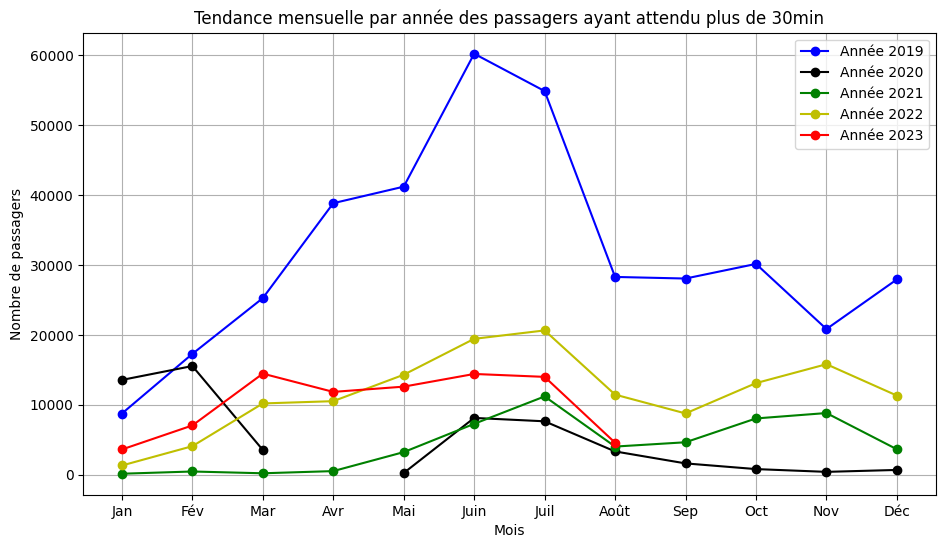

In [16]:
# @title
# Créez le graphique en barres empilées
plt.figure(figsize=(11, 6))
colors = ['b', 'black', 'g', 'y', 'r']  # Couleurs pour chaque année

for year, color in zip(monthly_data_1.index, colors):
    plt.plot(monthly_data_1.columns, monthly_data_1.loc[year], marker='o', label=f'Année {year}', color=color)

plt.xlabel('Mois')
plt.ylabel('Nombre de passagers')
plt.title('Tendance mensuelle par année des passagers ayant attendu plus de 30min')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.legend()

# Affichez le graphique
plt.grid(True)
plt.show()


Il y a des croisements entre les différentes années :
- au cours du mois de Janvier, il y a eu un croisement entre 2019--2020;
- au cours du mois de Fevrier, il y a eu un croisement entre 2020--2022, 2019--2023;
- au cours du mois d'Avril, il y a eu un croisement entre 2022--2023;
- au cours du mois de Mai, il y a eu un croisement entre 2020--2021;
- au cours du mois de Juin, il y a eu un croisement entre 2020--2021.

***

#### Tendance des passagers ayant attendu plus de 60min

In [17]:
# @title
monthly_data_2 = df_all.groupby(['Year', 'Month'])['ta_60'].sum().unstack()
monthly_data_2

Month     1       2       3       4       5        6        7       8   \
Year                                                                     
2019   723.0  1457.0  2771.0  6223.0  7027.0  13654.0  12444.0  2365.0   
2020   750.0   911.0   309.0     NaN    17.0    429.0    464.0   151.0   
2021    44.0    61.0    28.0    19.0   186.0    699.0   1434.0   234.0   
2022    75.0   246.0   919.0   815.0  1742.0   3160.0   4295.0  1380.0   
2023   322.0   749.0  2310.0  2324.0  2426.0   2802.0   2996.0   786.0   

Month      9       10      11      12  
Year                                   
2019   1798.0  2304.0  1122.0  5112.0  
2020     93.0    53.0    44.0    73.0  
2021    210.0   487.0   815.0   161.0  
2022    685.0  1780.0  2632.0  1506.0  
2023      NaN     NaN     NaN     NaN

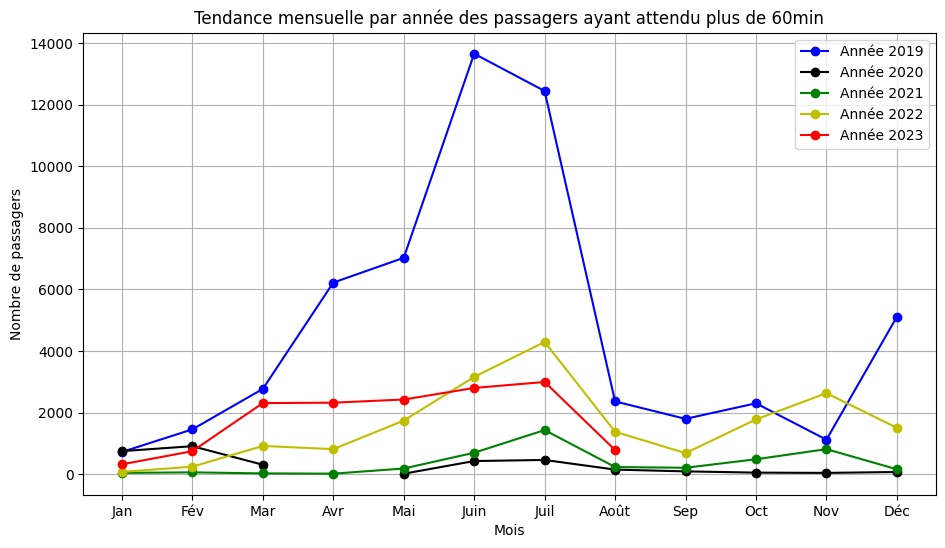

In [18]:
# @title
# Créez le graphique en barres empilées
plt.figure(figsize=(11, 6))
colors = ['b', 'black', 'g', 'y', 'r']  # Couleurs pour chaque année

for year, color in zip(monthly_data_2.index, colors):
    plt.plot(monthly_data_2.columns, monthly_data_2.loc[year], marker='o', label=f'Année {year}', color=color)

plt.xlabel('Mois')
plt.ylabel('Nombre de passagers')
plt.title('Tendance mensuelle par année des passagers ayant attendu plus de 60min')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.legend()

# Affichez le graphique
plt.grid(True)
plt.show()

Il y a des croisements entre les différentes années :
- au cours du mois de Janvier, il y a eu un croisement entre 2019--2020 et 2021--2O22;
- au cours du mois de Fevrier, il y a eu un croisement entre 2020--2023, 2020-2022 et 2021--2O22;
- au cours du mois de Mai, il y a eu un croisement entre 2022--2023;
- au cours du mois d'Octobre, il y a eu un croisement entre 2019--2022;
- au cours du mois de Novembre, il y a eu un croisement entre 2019--2022.

***

In [19]:
# @title
#création d'une dataset qui prend uniquement les données à partir de Janvier 2022 de "main_data"
sncf_22_23 = main_data[main_data['date'] >= '2022-01-01']
#sncf_22_23

### Graphique regroupant l'ensemble des passagers ayant attendu entre Janvier 2022 et Août 2023

In [20]:
# @title
fig = px.line(sncf_22_23, x='date', y=['ta_30','ta_60'], labels={'date': 'Date', 'value': 'Nombre'})

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    #plot_bgcolor='rgba(0,0,0,0)', #modifier la couleur de fond
    title="Graphique regroupant les passagers ayant attendu entre Janvier 2022 et Août 2023"
)

pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

fig.show()

***

### **Autocorrélation**


#### Graphiques ACF et PACF pour "ta_30"

##### **Fonction d'autocorélation (ACF)**

Au décalage k, il s'agit de la corrélation entre les valeurs de séries séparées par k intervalles. C'est-à-dire elle mesure la relation entre les nombres de passagers actuels qui ont attendus plus de **30mn** et les nombres historiques.

La formule de l'autocorrélation est donnée par :
$$\rho_{k} = \frac{\gamma_{k}}{\sigma²}$$
où :
- $\gamma_{k} = E\left[(X_t - \mu)(X_{t+k} - \mu)\right]$
- $\sigma$ : l'écart type de $X_t$
- $\mu$ : la moyenne de $X_t$
- $X_t$ : la valeur de la série temporelle à l'instant t.

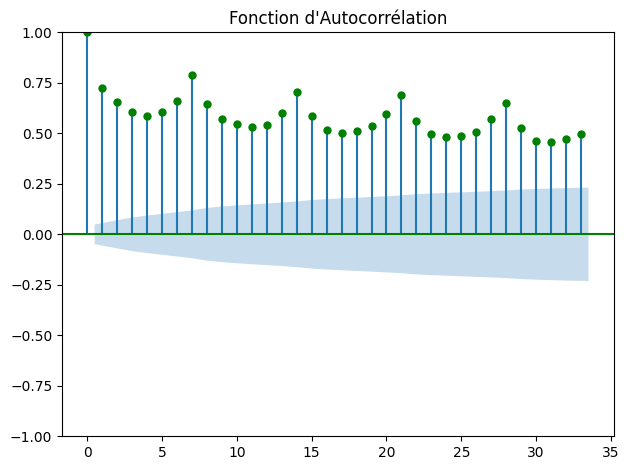

In [21]:
# @title
#!pip install statsmodels
import statsmodels
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(main_data.ta_30, color = 'g')
plt.title("Fonction d'Autocorrélation")

# Affichez le graphique
plt.tight_layout()
plt.show()

Les valeurs d'auto-corrélations diminuent légérement. On a des pics tous les 7 mois, ce qui traduit une saisonnalité de **7 mois**. Cela peut s'expliquer par les vacances d'été et de fin d'année.

***

##### **Fonction d'autocorrélation partielle (PACF)**

Au décalage k, il s'agit de la corrélation entre les valeurs de séries séparées par k intervalles, compte tenu des valeurs des intervalles intermédiaires.

La formule de l'autocorrélation partielle est donnée par :
$$\phi_k(p) = \frac{cov\left(X_t, X_{t-k} - \Sigma_{i=1}^{p} \phi_i * X_{t-i}\right)}{Var(X_t)}$$

où :
- $\phi_k(p)$ : est l'auto-corrélation partielle à l'ordre k pour un processus autorégressif d'ordre p (AR(p)),
- $cov(X_t, X_{t-k})$ : est la covariance entre la série temporelle originale et la série temporelle décalée de k pas,
- $\Sigma_{i=1}^{p} \phi_i * X_{t-i}$ : est la somme des valeurs précédentes pondérées par les coefficients AR,
- $Var(X_t)$ : est la variance de la série temporelle originale.


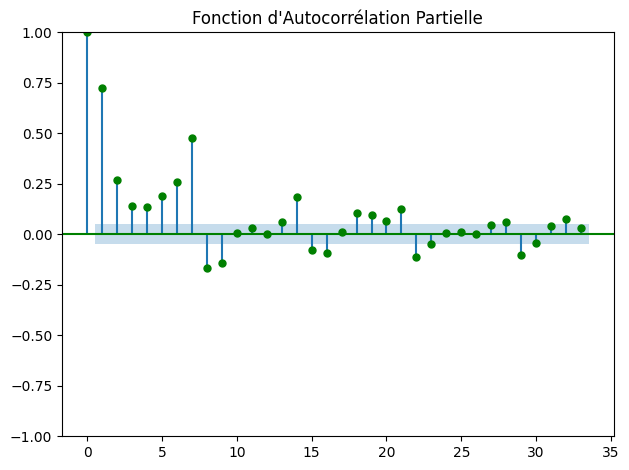

In [22]:
# @title
fig = tsaplots.plot_pacf(main_data.ta_30, color = 'g')
plt.title("Fonction d'Autocorrélation Partielle")

# Affichez le graphique
plt.tight_layout()
plt.show()

Quelques observations de décalages significatives qui diminuent brusquement à mesure que le décalage augmente

***

# **Estimation de la tendance**

## **Modèles paramètriques**

<center>
<table border=2 style="font-size: 40px;">

<thead>
<tr>
<th width="25%" height="25%" style="color: red;"><center> Tableau récapitulatif des modèles </center></th>
</tr>

</thead>
</table>
</center>

<center>
<table border=2 width="100%" height="300">

<thead>
<tr>
<th width="25%" height="25%" style="font-size: 25px;"><center> Modèles </center></th>
<th width="25%" height="25%" style="font-size: 25px;"><center> formules mathémmatiques </center></th>
<th width="25%" height="25%" style="font-size: 25px;"><center> Paramètres à optimiser </center></th>
</tr>
</thead>

<tr>
<td> <center> <span style="font-size: 20px;"> Linéaire </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">$y_t = \beta_0 + \beta_1.x_t + \epsilon_t$</span> </center> </td>
<td> <center> <span style="color: red; font-size: 20px;"> </span> </center> </td>
</tr>

<tr>
<td> <center> <span style="font-size: 20px;">Polynomiale </span> </center> </td>
<td> <center> <span style="color: red; font-size: 20px;">$ Y = \Sigma_{j=1}^{n}a_{j}X^{j} + \epsilon $</span> </center> </td>
<td> <center> <span style="color: red; font-size: 20px;"> Degré j </span> </center> </td>
</tr>

<tr>
<td> <center> <span style="font-size: 20px;"> GAM </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">$g(\mu) = \beta_0 + f_1(x_1) + f_2(x_2) + ... + f_m(x_m) $</span> </center> </td>
<td> <center> <span style="color: red; font-size: 20px;"> n_splines </span> </center> </td>
</tr>


</table>
</center>

* * *

### **- Regression linéaire**

La regression linéaire est donnée par la formule :
$$y_t = \beta_0 + \beta_1.x_t + \epsilon_t$$
avec :
- $\beta_0$ : l'ordonnée à l'origine,
- $\beta_1$ : le coefficient linéaire lié à la variable explicative $X$,
- $\epsilon_t$ : l'erreur

In [23]:
# @title
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

data_main = main_data
data_main['date_num'] = pd.to_numeric(data_main['date'])

X = np.array(data_main['date_num']).reshape(-1, 1)
y = np.array(data_main['ta_30']).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Résumé de la régression linéaire
X = sm.add_constant(X)  # Ajout d'une colonne de 1 pour l'ordonnée à l'origine
model = sm.OLS(y, X)
results = model.fit()
#results.summary()

In [25]:
# @title
import plotly.graph_objects as go
import plotly.express as px

# main_data a une colonne 'date' en tant qu'index
fig = go.Figure()

# on ajoute les données originales
fig.add_trace(go.Scatter(x=main_data['date'], y=main_data['ta_30'], mode='lines', name='ta_30', line=dict(color='blue')))

# on ajoute la régression linéaire
fig.add_trace(go.Scatter(x=main_data['date'], y=y_pred.flatten(), mode='lines', name='Régression linéaire', line=dict(color='red')))

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

# la Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    title="Estimation de la tendance : régression linéaire des ta_30",
    xaxis_title="Années",
    yaxis_title="ta_30",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()


***

### **- Regréssion polynomiale**

La régression polynomiale est une forme d’analyse de régression dans laquelle la relation entre la variable explicative et la variable expliquée est modélisée comme un polynôme.

Une régression polynomiale de degréé n sur une variable X est donnée par la formule : $$ Y = \Sigma_{j=1}^{n}a_{j}X^{j} + \epsilon $$
où :
- $a_{j}$ : les coefficients
- $\epsilon$ : l'erreur

Représentation avec une régression polynomiale de degré 2 :

In [26]:

# Utilisez la colonne 'date' comme étiquettes de l'axe x
x = main_data['date']
y = main_data['ta_30']

# Convertissez la colonne 'date' en valeurs numériques pour la régression polynomiale
x_numeric = np.arange(len(main_data))

# Ajustez un modèle de régression polynomiale d'ordre 2
coefficients = np.polyfit(x_numeric, y, 2)
polynomial = np.poly1d(coefficients)

# Créez une séquence de valeurs x pour le graphique
x_values = np.linspace(0, len(main_data), len(main_data))

# Calculez les valeurs prédites y pour le graphique
y_poly_pred = polynomial(x_values)

#  le graphique avec plotly
fig = go.Figure()

#  les données originales
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', line=dict(color='blue')))

#  la régression polynomiale
fig.add_trace(go.Scatter(x=x, y=y_poly_pred, mode='lines', name='Régression Polynomiale', line=dict(color='red')))

# la Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title='Estimation de la tendance: Régression Polynomiale',
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()


Ce model de régression polynomiale de degré deux n'ajuste pas bien nos données.

Essayons de varier le degré du polynome.

**Représentation avec différentes valeurs du degre.**

valeur_degre = [1, 5, 10, 15, 20, 27, 30]

**Selection du meilleur degré**

Il faut maintenant selectionner le meilleur degré possible pour notre modèle en comparant les modèles à l'aide du critères AIC.

- **AIC**

Le critère d'information d'Akaike (AIC) est une métrique utilisée pour comparer l'ajustement de différents modèles.

Il est calculé comme suit :

AIC = $2(p + 1) - log(L_{p})$

où :

- p + 1 : le nombre de paramètre du modèle
- $log(L_{p})$ : la log-vraisemblance du modèle. Cela nous indique la probabilité du modèle, compte tenu des données.


In [27]:

# Utilisez la colonne 'date' comme étiquettes de l'axe x
x = main_data['date']
y = main_data['ta_30']

# Convertissez la colonne 'date' en valeurs numériques pour la régression polynomiale
x_numeric = np.arange(len(main_data))

# Créez le graphique
plt.figure(figsize=(15, 6))
#plt.plot(x, y, label='ta_30', color='grey')

# Créez une séquence de valeurs x pour le graphique
x_values = np.linspace(0, len(main_data), len(main_data))

# Créez la figure
fig = go.Figure()

# Ajouter les données originales
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', line=dict(color='grey')))

# Différentes valeurs du dégré
valeur_degre = [1, 5, 10, 15, 20, 27, 30]

# Initialisation des variables
best_degre = None
best_aic = float('inf')
best_smoothed_values = None

# Ajoutez différentes lignes de régression polynomiale avec des couleurs différentes
for degre in valeur_degre:
    # Ajustez un modèle de régression polynomiale avec le degré actuel
    coefficients = np.polyfit(x_numeric, y, degre)
    polynomial = np.poly1d(coefficients)

    # Calculez les valeurs prédites y pour le graphique
    y_poly_pred = polynomial(x_values)

     # Calculate AIC
    residuals = y - y_poly_pred
    mse = np.mean(residuals**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * (2 * len(valeur_degre))  # 2 paramètres pour chaque frac_values
    #print(f"{degre} : {aic}")

    # Update the best model if the current one has a lower AIC
    if aic < best_aic:
        best_degre = degre
        best_aic = aic
        best_smoothed_values = y_poly_pred

# Utilisez la palette 'Jet' pour des couleurs plus contrastées
#color = px.colors.sequential.Jet[degre // 4]
fig.add_trace(go.Scatter(x=x, y=y_poly_pred, mode='lines', name=f'Polynomiale (degré {best_degre})', line=dict()))

# Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title='Estimation de la tendance: Régression Polynomiale',
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()

print(f"Le meilleur modèle Polynomial a pour degre={best_degre} avec un AIC={round(best_aic, 2)}")


Le meilleur modèle Polynomial a pour degre=27 avec un AIC=19068.76


<Figure size 1500x600 with 0 Axes>

La régression polynomiale de degré 1 est la même que la régression linéaire simple.

***

In [28]:
# @title
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

# Convertissez la colonne 'date' en valeurs numériques pour la régression polynomiale
x_numeric = np.arange(len(main_data))

# Degrés de polynôme à tester
degrees = list(range(1, 21, 4))

# Initialisez une liste pour stocker les valeurs AIC
aic_values = []

for degree in degrees:
    # Ajustez un modèle de régression polynomiale avec le degré actuel
    coefficients = np.polyfit(x_numeric, main_data['ta_30'], degree)

    # Ajustez un modèle de régression linéaire aux données
    X_poly = np.column_stack([x_numeric ** i for i in range(degree + 1)])
    model = OLS(main_data['ta_30'], X_poly).fit()

    # Calculez l'AIC du modèle
    aic = model.aic
    aic_values.append(aic)

# Affichez les valeurs AIC pour chaque degré de polynôme
#for i, degree in enumerate(degrees):
#    print(f'Degré {degree}: AIC = {aic_values[i]:.2f}')



### **- Modèle Additif Généralisé (GAM)**

Comme les modèles linéaires, les modèles additifs permettent de modéliser une variable à expliquer avec des fonctions de lissage non-linéaires des prédicteurs. Sa formule est une fonction de lien $g$ reliant la valeur attendue de la distribution aux prédicteurs, et tentant d'ajuster les fonctions $f_i$ pour satisfaire:
$$g(\mu) = \beta_0 + f_1(x_1) + f_2(x_2) + ... + f_m(x_m) $$
où les fonctions $f_i$ peuvent être ajustées en utilisant les moyennes non paramétriques ou paramétriques, et fournissant ainsi potentiellement de meilleurs ajustements aux données que les autres méthodes.

In [29]:
#!pip install pygam
import pygam
import plotly.graph_objects as go

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# modèle GAM
gam = pygam.LinearGAM(n_splines=20).gridsearch(x_numeric.values.reshape(-1, 1), y.values)

# Prediction avec le modèle GAM
y_pred = gam.predict(x_numeric.values.reshape(-1, 1))

# Summary du modèle GAM
gam.summary()

# Représentation graphique avec plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', marker=dict(color='blue')))

# Predictions GAM
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='GAM "n_spline=20"', line=dict(color='red')))

fig.update_layout(title='Représentation du Modèle GAM',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2378
Link Function:                     IdentityLink Log Likelihood:                                -20573.6916
Number of Samples:                         1616 AIC:                                            41187.8587
                                                AICc:                                           41188.3977
                                                GCV:                                           137852.6345
                                                Scale:                                         134901.8618
                                                Pseudo R-Squared:                                   0.5585
Feature Function                  Lam

* * *

**Représentation du modèle GAM avec différents n_spline**

valeur_n_splines = [5, 20, 50, 90, 130]


In [30]:
# @title

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# Représenttaion graphique avec plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', marker=dict(color='blue')))

# Différents splines
nspline_values = [5, 20, 50, 90, 130]

# Initialisation des variables
best_nspline = None
best_aic = float('inf')
best_smoothed_values = None

for nspline in nspline_values:
    # modèle GAM
    gam = pygam.LinearGAM(n_splines=nspline).gridsearch(x_numeric.values.reshape(-1, 1), y.values)
    # Predictiction avec le modele GAM
    y_pred = gam.predict(x_numeric.values.reshape(-1, 1))

    # Calculate AIC
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * (2 * len(nspline_values))  # 2 paramètres pour chaque frac_values
    #print(f"{nspline} : {aic}")

    # Update the best model if the current one has a lower AIC
    if aic < best_aic:
        best_nspline = nspline
        best_aic = aic
        best_smoothed_values = y_pred

# Predictions GAM
fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name=f'GAM "n_spline={best_nspline}"', line=dict()))



fig.update_layout(title='Représentation du Modèle GAM',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()

print(f"Le meilleur modèle GAM a pour nspline={best_nspline} avec un AIC={round(best_aic, 2)}")


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:  00:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################    

Le meilleur modèle GAM a pour nspline=130 avec un AIC=18684.05


* * *

- **Selection du meilleur modèle**

Il faut maintenant selectionner le meilleur degré possible pour notre modèle en comparant les modèles à l'aide du critères AIC.

**AIC**

AIC = $2(p + 1) - log(L_{p})$

où :

- p + 1 : le nombre de paramètre du modèle
- $log(L_{p})$ : la log-vraisemblance du modèle. Cela nous indique la probabilité du modèle, compte tenu des données.


* * *

## **Modèles non-paramétriques ou Méthode de lissage**

L'idée ici c'est tout simplement de supprimer les variations saisonnières et donc de faire apparaitre tout simplement une tendance.

Ces méthodes ci-dessous sont utilisées pour lisser et donc pour faire apparaitre la tendance.


<center>
<table border=2 style="font-size: 20px;">

<thead>
<tr>
<th width="20%" height="10%" style="color: red;"><h2><center> Tableau récapitulatif des modèles </center></th>
</tr>

</thead>
</table>
</center>

<div class="title-container" style="background-color: #3498db; color: #2ecc71; padding: 0.5px; border-radius: 5px; text-align: center; font-size: 10px">

<center>
<table border=2 width="100%" height="20%" style="font-size: 15px;">

<thead>
<tr>
<th width="25%" height="10%" style="font-size: 15px;"><h2><center> Modèles </center></th>
<th width="25%" height="10%" style="font-size: 15px;"><h2><center> formules mathémmatiques </center></th>
<th width="25%" height="10%" style="font-size: 15px;"><h2><center> Hyper-paramètres </center></th>
</tr>
</thead>

<tr>
<td> <center><b> B-splines </b></center> </td>
<td>  <span style="color: red;"><center><b> $\sum_{i=0}^{m-n-1} b_{i,n}(t).P_i$ </b> </center></span> </td>
<td>  <span style="color: red;"><center><b> Degré n </b> </center></span></td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> LOESS </b> </center> </td>
<td>  <span style="color: red;"><center><b> $r(x) = \sum_{i=1}^{n} w_h(x_i - x)Y_i$ <br></p> où $\ w_h(x_i - x) = \frac{K(\frac{x_i - x}{h})}{\sum_{i=1}^{n} K(\frac{x_i - x}{h})}$ </b> </center></span> </td>
<td>  <span style="color: red;"><center><b> h : le pourcentagedes points les plus proches </b></center></span> </td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> Moyenne mobile simple </b></center> </td>
<td>  <span style="color: red;"><center><b> $\hat{T}_t = \frac{1}{q}{\Sigma_{i=-n}^n y_{t+i}}$ </b></center></span></td>
<td> <span style="color: red;"><center><b> q : l'ordre de la moyenne mobile </b></center></span> </td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> Lissage par Moyenne mobile </b></center> </td>
<td> <span style="color: red;"><center><b> $r(x) = \Sigma_{i=1}^{n}{w_m({x_i} - x)Y_i}$ </b></center></span></td>
<td> <span style="color: red;"><center><b> m : paramètre de lissage </b></center></span> </td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> Lissage exponenciel simple (LES) </b></center> </td>
<td> <span style="color: red;"><center><b> $\hat{Y}_t = \beta * Y_t + (1 - \beta) * \hat{Y_{t-1}}$ </b></center></span> </td>
<td> <span style="color: red;"><center><b> $\beta \ $ : paramètre de lissage compris entre 0 et 1 </b></center></span> </td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> Lissage exponenciel double (LED) </b> </center> </td>
<td> <span style="color: red;"><center><b> $L_t = \alpha.Y_t + (1 - \alpha)(L_{t-1} + T_{t-1})$ <br></p> où $ \ T_t = \beta[L_t - L_{t-1}] + (1 - \beta)T_{t-1}$ </b></center></span> </td>
<td> <span style="color: red;"><center><b> $\beta \ $ : le coefficient de lissage pour la tendance <br></p>
$\alpha$ :  le coefficient de lissage pour le niveau </b></center></span> </td>
</tr>

<tr>
<th> <center>  </center> </th>
</tr>

<tr>
<td> <center><b> Holt-Winters </b></center> </td>
<td> <span style="color: red;"><center><b> $L_t = \alpha.(Y_t - S_{t-m}) + (1 - \alpha)(L_{t-1} + T_{t-1})$ <br></p> où $ \ T_t = \beta(L_t - L_{t-1}) + (1 - \beta).T_{t-1}$ <br></p>
et $ \ S_t = \gamma(Y_t - L_{t-1} - T_{t-1}) + (1 + \gamma)S_{t-m}$ </b></center> </span> </td>
<td> <span style="color: red;"><center><b> $\gamma$ : le coefficient de lissage pour la saisonnalité. <br></p>
$m$ : la période de la saisonnalité, </b></center></span> </td>
</tr>

</table>
</center>

* * *

### **- B-splines**

Une régression B-pline est une combinaison linéaire de splines En mathématiques, une B-spline est une combinaison linéaire de splines positives à support compact minimal. Les B-splines sont la généralisation des courbes de Bézier, elles peuvent être à leur tour généralisées par les NURBS (Non-Uniform Rational Basis Splines).

La formule de la regression B-spline est donnée par :
$$\sum_{i=0}^{m-n-1} b_{i,n}(t).P_i$$
où :
- $t \in \left[t_n, t_{n-m}\right]$,
- m+1 est le nombre de noeud,
- n est le dégré du B-spline,
- $P_i$ sont des polygones de contrôle, composés de m-n points,
- $b_{i,n}$ est la matrice de ligne *i* et de colonne *n*.

Les *m-n* fonctions B-splines de degré *n* sont définies par recurrence :    
$$ b_{j,0}(t) = \left\{
  \begin{array}{ll}
  1 & \text{si} \ t_j \le t \le t_{j+1} \\
  0 & \text{sinon.}
  \end{array}
  \right.$$

$ b_{j,n}(t) = \frac{t - t_j}{t_{j+n} - t_j} b_{j, n-1}(t) + \frac{t_{j+n+1} - t}{t_{j+n+1} - t_{j+1}} b_{j+1,n-1}(t) $ pour tout $j = 0, 1, ..., m-2$

In [31]:
# @title
from scipy import interpolate

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

t, c, degre = interpolate.splrep(x_numeric, y, s=0, k=2)

# Utiliser des valeurs numériques pour l'espace intercalaire
xx_numeric = np.linspace(x_numeric.min(), x_numeric.max(), 100)

spline = interpolate.BSpline(t, c, degre, extrapolate=False)

# Reconvertir en date pour la représentation graphique
xx = pd.to_datetime(xx_numeric, unit='s')

# Représenttaion graphique avec plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Points ta_30', marker=dict(color='blue')))

# BSpline curve
fig.add_trace(go.Scatter(x=xx, y=spline(xx_numeric), mode='lines', name='BSpline degre 2', line=dict(color='red')))

fig.update_layout(title='Régréssion BSpline',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()


Représentation avec différents degré de B-spline

degrees = [2, 3, 4, 5]

In [32]:
# @title

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# Utiliser des valeurs numériques pour l'espace intercalaire
xx_numeric = np.linspace(x_numeric.min(), x_numeric.max(), 100)

# Reconvertir en date pour la représentation graphique
xx = pd.to_datetime(xx_numeric, unit='s')

# Représenttaion graphique avec plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Points ta_30', marker=dict(color='blue')))

degrees = [2, 3, 4, 5]

# Initialisation des variables
best_degree = None
best_aic = float('inf')
best_smoothed_values = None

for degree in degrees:
    t, c, k = interpolate.splrep(x_numeric, y, s=0, k=degree)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)
    # Predictiction avec le modele BSpline
    y_pred = spline(x_numeric)
    
    # Calculate AIC for the current degree
    residuals = y - y_pred
    aic = len(y) * np.log(np.mean(residuals**2)) + 2 * (degree + 1)
    
    if aic < best_aic:
        best_aic = aic
        best_degree = degree
        best_smoothed_values = spline(xx_numeric)
        
# Predictions BSpline
fig.add_trace(go.Scatter(x=xx, y=best_smoothed_values, mode='lines', name=f'BSpline "degree={best_degree}"', line=dict()))
        

fig.update_layout(title='Regression BSpline',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()

print(f"Le meilleur modèle BSpline a pour degré={best_degree} avec un AIC={round(best_aic, 2)}")

Le meilleur modèle BSpline a pour degré=3 avec un AIC=-96873.9


* * *

In [33]:
# Calcul du meilleur AIC pour le modèle BSpline

x = main_data.index
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# Differents degre
degrees = [2, 3, 4, 5]

# Boucle d'itération
for degree in degrees:
    t, c, k = interpolate.splrep(x_numeric, y, s=0, k=degree)
    spline = interpolate.BSpline(t, c, k, extrapolate=False)

    # Calcule de chaque l'AIC de chaque degre
    interpolated_values = spline(x_numeric)
    residuals = y - interpolated_values
    mse = np.mean(residuals**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * (degree + 1)

    #print(f"le B-spline de degre {degree} a pour AIC : {aic}")


* * * 

### **- Lissage par régression polynomiale à pondération locale (LOESS)**


La régression loess (ou “lowess”) est une méthode de régression non-paramétrique (c’est-à-dire qu’elle n’est pas associée à une équation, comme par exemple une régression linéaire ou polynomiale classique). Elle permet de produire des courbes lissées.

Dans une régression loess, l’ajustement de la courbe se fait localement. Pour déterminer la valeur y que prend la courbe au point d’abscisse $x_i$, on ajuste un polynôme de degré 1 ou 2 aux points au voisinage de $x_i$. Cet ajustement se fait avec pondération: les points les plus proches de $x_i$ ont davantages de poids dans l’ajustement.

Sa formule est donnée par :
$$r(x) = \sum_{i=1}^{n} w_h(x_i - x)Y_i$$
où $$w_h(x_i - x) = \frac{K(\frac{x_i - x}{h})}{\sum_{i=1}^{n} K(\frac{x_i - x}{h})}$$ et :
- h est le pourcentage des points les plus proches.

In [34]:
# @title
import statsmodels.api as sm

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# LOESS regression
lowess = sm.nonparametric.lowess(y, x_numeric, frac=0.2)

# Extraction des valeurs lissé de y
y_smoothed = lowess[:, 1]

# Représentation graphique avec Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Points ta_30', marker=dict(color='blue')))

# LOESS regression curve
fig.add_trace(go.Scatter(x=x, y=y_smoothed, mode='lines', name='LOESS Regression "frac%=0.2"', line=dict(color='red')))

fig.update_layout(title='LOESS Regression',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()


* * *

**Représentation avec différentes valeurs de frac.**

frac_values = [0.05, 0.1, 0.2, 0.5, 0.7, 0.9]

In [35]:
# @title

x = main_data['date']
y = main_data['ta_30']

# Convertir les dates en valeur numérique
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# Représentation graphique avec Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', marker=dict(color='blue')))

# Différentes valeurs de h
frac_values = [0.05, 0.1, 0.2, 0.5, 0.7, 0.9]

# Initialize variables to track the best LOESS model
best_frac = None
best_aic = float('inf')
best_smoothed_values = None

for frac in frac_values:
    # LOESS regression
    lowess = sm.nonparametric.lowess(y, x_numeric, frac=frac)
    # Extraction des valeurs lissé de y
    y_smoothed = lowess[:, 1]

    # Calculate AIC
    residuals = y - y_smoothed
    mse = np.mean(residuals**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * (2 * len(frac_values))  # 2 paramètres pour chaque frac_values

    # Update the best model if the current one has a lower AIC
    if aic < best_aic:
        best_frac = frac
        best_aic = aic        
        best_smoothed_values = y_smoothed

# LOESS regression curve
fig.add_trace(go.Scatter(x=x, y=best_smoothed_values, mode='lines', name=f'LOESS Regression "frac%={best_frac}"', line=dict()))

fig.update_layout(title='LOESS Regression',
                  width=1000,  # Largeur en pixels
                  height=600,  # Hauteur en pixels
                  xaxis_title="Années",
                  yaxis_title="ta_30",
                  xaxis=dict(tickangle=45),
                  legend=dict(x=1, y=1, traceorder='normal', orientation='v')
                  )

fig.show()


print(f"Le meilleur modèle LOESS a pour frac={best_frac} avec un AIC={round(best_aic, 2)}")


Le meilleur modèle LOESS a pour frac=0.05 avec un AIC=18933.86


* * *

In [36]:
# Calcul du meilleur AIC pour le modèle LOESS

# Assuming main_data.index is a DatetimeIndex
x = main_data.index
y = main_data['ta_30']

# Convert Timestamps to numeric values
x_numeric = pd.to_numeric(x) / 10**9  # Convertir les nanosecondes en secondes

# Differentes valeurs de h
frac_values = [0.05, 0.1, 0.2, 0.5, 0.7, 0.9]

# Itération pour choisir avoir les différents AIC
for h_value in frac_values:
    lowess = sm.nonparametric.lowess(y, x_numeric, frac=h_value)
    y_smoothed = lowess[:, 1]
    # Calcul AIC
    residuals = y - y_smoothed
    mse = np.mean(residuals**2)
    n = len(y)
    aic = n * np.log(mse) + 2 * (2 * len(frac_values))  # 2 parametres pour chaque h_value

    #print(f"Le model LOESS avec h={h_value} a pour AIC: {aic}")


* * *

### **-Moyenne mobile simple**

La moyenne mobile d'ordre q (**MA(q)**) est la série des moyennes de q observations consécutives.

On estime la tendance au moment t en calculant la moyenne des n moments.

Sa formule : $$\hat{T}_t = \frac{1}{q}{\Sigma_{i=-n}^n y_{t+i}}$$

avec q = 2n + 1.

On veut lisser encore plus la tendance, il est possible d'appliquer une moyenne mobile sur une moyenne mobile. Cela à la particularité de rendre la moyenne mobile symétrique pour un ordre q pair.

Enfin, il est possible d'ajouter un poids non uniforme :

$$r(x) = \Sigma_{i=1}^{n}{w_m({x_i} - x)Y_i}$$

où :

- ${w_m}$ est une fonction de poids loccaux
- m : le paramètre de lissage
- ${x_i}$ et x sont des observations
- $n = \frac{m - 1}{2}$

Le choix de m définie le risque et la décision de supprimer la saisonnalité

Le graphique ci-dessous présente l'évolution de la série chronologoque et la moyenne mobile des nombres journaliers de passagers ayant attendu plus de 30mn au guichets sncf des différents gares entre janvier 2019 et août 2023. On calcule la moyenne mobile avec une fenêtre de 12 périodes correspondant au mois de l'année.

In [37]:
# @title

main_data = data.groupby('date')[['ta_30','ta_60', 'arrives']].sum().reset_index()

# la colonne "date" est au format datetime .
main_data['date'] = pd.to_datetime(main_data['date'])

# on définisse la colonne "date" comme index de la DataFrame.
main_data.set_index('date', inplace=True)

# rolling() pour effectuer le calcul sur la fenêtre glissante et calculer la moyenne mobile en utilisant la fonction mean().
# le calcul de la moyenne mobile sur 12 mois de l'année
moyenne_mobile = main_data['ta_30'].rolling(12).mean()

# Utilisez la colonne 'date' comme étiquettes de l'axe x
x = main_data.index
y_original = main_data['ta_30']
y_moyenne_mobile = moyenne_mobile  # Assurez-vous d'avoir défini cette variable correctement

# Créez la figure
fig = go.Figure()

# Ajouter les données originales
fig.add_trace(go.Scatter(x=x, y=y_original, mode='lines', name='ta_30', line=dict(color='blue')))

# Ajouter la moyenne mobile
fig.add_trace(go.Scatter(x=x, y=y_moyenne_mobile, mode='lines', name='MA(12)', line=dict(color='red')))

# Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Séries chronologiques et moyenne mobile des ta_30",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()


En rouge nous avons le cycle de la tandance. On a lissé et comme vous pouvez le voir sur le graphique on a moins de données extrêmes. Cela signifie qu'au fur et à mesure qu'on lisse, on perd des informations.

* * *

**Représentation avec différentes valeurs de degree de MA.**

degrees = [12, 24, 36, 48]

In [38]:

main_data = data.groupby('date')[['ta_30','ta_60', 'arrives']].sum().reset_index()

# la colonne "date" est au format datetime .
main_data['date'] = pd.to_datetime(main_data['date'])

# on définisse la colonne "date" comme index de la DataFrame.
main_data.set_index('date', inplace=True)

# Créez la figure
fig = go.Figure()

# Ajouter les données originales
fig.add_trace(go.Scatter(x=x, y=y_original, mode='lines', name='ta_30', line=dict(color='blue')))

# Différents degrés de la moyenne mobile
degrees = [12, 24, 36, 48]

# Initialisation des variables
best_degree = None
best_aic = float('inf')
best_smoothed_values = None

for degree in degrees:
    # le calcul de la moyenne mobile sur les degrees
    # rolling() pour effectuer le calcul sur la fenêtre glissante et calculer la moyenne mobile en utilisant la fonction mean().
    moyenne_mobile = main_data['ta_30'].rolling(degree).mean()
    
    # Créez un modèle de moyenne mobile avec le nombre de degré
    model_mm = sm.tsa.ARIMA(main_data['ta_30'], order=(0, 0, 0), seasonal_order=(0, 1, 1, degree))
    results_mm = model_mm.fit()
    
    # Obtenez les valeurs AIC pour chaque modèle
    aic = results_mm.aic
    
    if aic < best_aic:
        best_aic = aic
        best_degree = degree
        best_smoothed_values = moyenne_mobile


# Ajouter la moyenne mobile (MA(best_degree))
fig.add_trace(go.Scatter(x=x, y=best_smoothed_values, mode='lines', name=f"MA({best_degree})", line=dict(color='red')))

# Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Moyenne mobile des ta_30",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()

print(f"Le meilleur modèle MA a pour degré={best_degree} avec un AIC={round(best_aic, 2)}")

Le meilleur modèle MA a pour degré=48 avec un AIC=24007.18


In [39]:
# @title

# Créez un modèle de moyenne mobile avec une fenêtre de 12 mois
model_mm_12 = sm.tsa.ARIMA(main_data['ta_30'], order=(0, 0, 0), seasonal_order=(0, 1, 1, 12))
results_mm_12 = model_mm_12.fit()

# Créez un modèle de moyenne mobile avec une fenêtre de 24 mois
model_mm_24 = sm.tsa.ARIMA(main_data['ta_30'], order=(0, 0, 0), seasonal_order=(0, 1, 1, 24))
results_mm_24 = model_mm_24.fit()

# Créez un modèle de moyenne mobile avec une fenêtre de 48 mois
model_mm_48 = sm.tsa.ARIMA(main_data['ta_30'], order=(0, 0, 0), seasonal_order=(0, 1, 1, 48))
results_mm_48 = model_mm_48.fit()

# Obtenez les valeurs AIC pour chaque modèle
aic_mm_12 = results_mm_12.aic
aic_mm_24 = results_mm_24.aic
aic_mm_48 = results_mm_48.aic

#print("AIC pour moyenne mobile 12 mois:", aic_mm_12)
#print("AIC pour moyenne mobile 24 mois:", aic_mm_24)
#print("AIC pour moyenne mobile 48 mois:", aic_mm_48)


***

### <b>Lissage exponentiel</b>

Il s’applique à des séries chronologiques sans tendance. Le principe consiste à donner plus d’importance aux dernières observations. On ne prolonge pas une série comme on le ferait, par exemple, avec une régression simple mais on cherche à obtenir une valeur lissée en t pour la reporter tout simplement en t+1.

On en distingue différents types (**Lissage exponentiel simple**, **Lissage exponentiel double**,  **Holt-Winters** ...)


#### **Lissage exponentiel simple (LES)**

On emploie le lissage exponentiel simple (LES) lorsqu’il n’existe aucune tendance.

Sa formule est donnée par :
$$\hat{Y}_t = \beta * Y_t + (1 - \beta) * \hat{Y_{t-1}}$$
avec :
- $\hat{Y}_t$ : la valeur prédite de la série temporelle à l'instant $t$,
- $Y_t$ : la valeur observée de la série temporelle à l'instant $t$,
- $\beta$ : le paramètre de lissage, qui contrôle la contribution relative de la valeur observée actuelle par rapport à la prédiction précédente.

ou

$$\hat{r}(x) = \Sigma_{i=1}^{n} w_\beta(x_i - x)Y_i$$
avec :
- $w_\beta(x_i - x) = \frac{\beta|x - x_i|}{\Sigma_{i=1}^n\beta|x - x_i|}$,

- $Y_i$ : est la valeur observée de la série temporelle à l'instant $i$,

- $\beta$ : le paramètre de lissage compris entre 0 et 1

Voyons la représentation avec $\beta = 0.6$

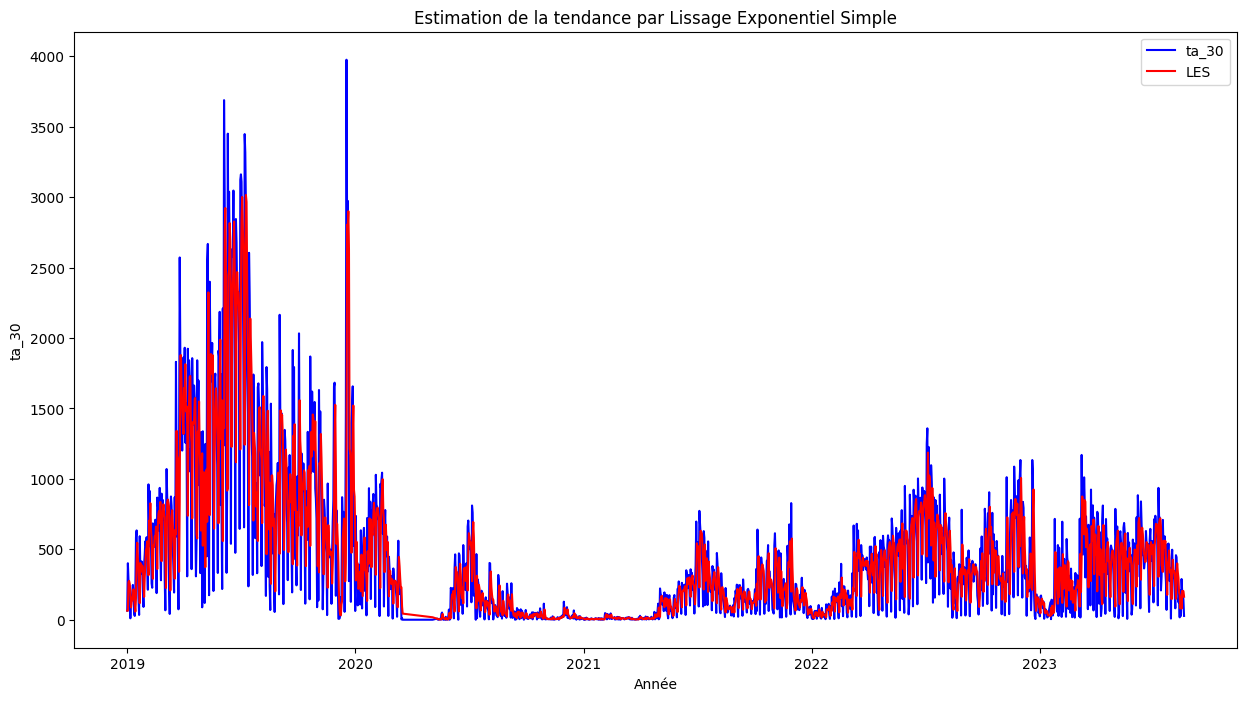

In [40]:
# @title
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

x = main_data.index
y = main_data['ta_30']

# fonction pour effectuer le lissage exponentiel simple
LES = SimpleExpSmoothing(y).fit(smoothing_level=0.6, optimized=False)

# Créer le graphique
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='ta_30', color='blue')
plt.plot(x, LES.fittedvalues, label='LES', color='red')

plt.legend(loc='best')
plt.xlabel('Année')
plt.ylabel('ta_30')
plt.title('Estimation de la tendance par Lissage Exponentiel Simple')
plt.show()


Avec ce paramètre, les données ne sont pas bien lissées.

Ce paramètre nous permet de décider combien nous crayons en les données récentes par rapport aux données plus anciennes des passagers.

Si $\beta$ est proche de 1, cela signifie que le nombre quotidien de passagers ayant attendu plus de 30mn en aoùt 2023 étaient très important et que nous ne prêtons pas autant d'attention aux jours précedents. Ce qui n'est pas forcément le cas car il y avait un flux de passagers entre 2019 et 2020 et c'est important de le prendre en compte.

Dans notre contexte il est préférable de rapprocher le $\beta$ vers 0 car nous fausons confiance aux données des passagers d'aoùt 2023 autant  qu'à celles d'il y a un ou deux an.

Les graphiques ci-dessous montre le lissage en fonction de la valeur du paramètre de lissage $\beta$.

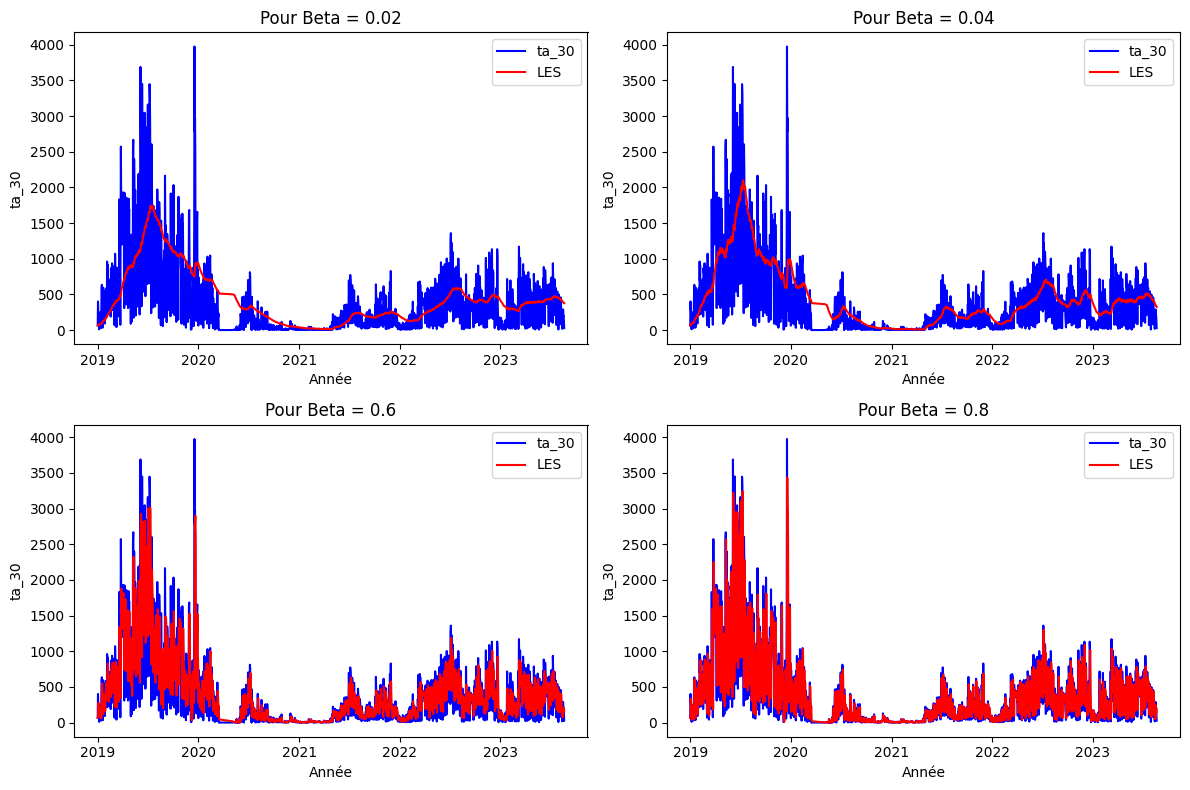

In [41]:
# @title

x = main_data.index
y = main_data['ta_30']

# Valeurs d'alpha à tester
beta_values = [0.02, 0.04, 0.6, 0.8]

# je crée une figure avec 2 lignes et 2 colonnes de sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# pour aplatir la liste des axes pour pouvoir les parcourir plus facilement
axes = axes.flatten()

for i, beta in enumerate(beta_values):
    # le lissage exponentiel simple avec la valeur d'alpha actuelle
    LES = SimpleExpSmoothing(y).fit(smoothing_level=beta, optimized=False)

    # le graphique dans le sous-graphique correspondant
    axes[i].plot(x, y, label='ta_30', color='blue')
    axes[i].plot(x, LES.fittedvalues, label=f'LES', color='red')
    axes[i].legend(loc='best')
    axes[i].set_xlabel('Année')
    axes[i].set_ylabel('ta_30')
    axes[i].set_title(f'Pour Beta = {beta}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les sous-graphiques
plt.show()





Le modèle de paramètre de lissage $\beta$ égual à 0.04 ajuste mieux nos données.

***

#### **Lissage exponentiel double (LED)**

On applique un second lissage exponentiel au premier lissage exponentiel simple afin de prendre en compte la tendance.

Sa formule est donnée par :
$$L_t = \alpha.Y_t + (1 - \alpha)(L_{t-1} + T_{t-1})$$
où :
$$T_t = \beta[L_t - L_{t-1}] + (1 - \beta)T_{t-1}$$
avec :
- $Y_t$ : la valeur observée de la série temporelle à l'instant $t$,
- $L_t$ : le niveau de la série temporelle à l'instant $t$,
- $T_t$ : la tendance de la série temporelle à l'instant $t$,
- $\alpha$ : le coefficient de lissage pour le niveau,
- $\beta$ : le coefficient de lissage pour la tendance.

Représentation graphique du LED

In [42]:
# @title
from statsmodels.tsa.holtwinters import ExponentialSmoothing

x = main_data.index
y = main_data['ta_30']

# le lissage exponentiel double
DES = ExponentialSmoothing(y, trend='add', seasonal='add', damped_trend=False, seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.3)

# Créez la figure
fig = go.Figure()

# Ajoutez les données originales
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', line=dict(color='blue')))

# Ajoutez les valeurs ajustées du lissage exponentiel double
fig.add_trace(go.Scatter(x=x, y=DES.fittedvalues, mode='lines', name='LED: (0.1, 0.3)', line=dict(color='red')))

# Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Estimation de la tendance par Lissage Exponentiel Double",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

# Afficher le graphique
fig.show()


**Représentation avec différentes valeurs de alpha et beta de LED.**

- alpha = [0.1, 0.3, 0.5, 0.7, 0.9]

- beta = [0.1, 0.3, 0.5, 0.7, 0.9]


In [43]:
main_data = data.groupby('date')[['ta_30', 'ta_60', 'arrives']].sum().reset_index()

# la colonne "date" est au format datetime.
main_data['date'] = pd.to_datetime(main_data['date'])

# on définisse la colonne "date" comme index de la DataFrame.
main_data.set_index('date', inplace=True)

# Utilisez la colonne 'date' comme étiquettes de l'axe x
x = main_data.index
y_original = main_data['ta_30']

# Initialisation des variables
best_aic = float('inf')
best_smoothing_params = None
best_smoothed_values = None

# Représentation graphique avec plotly
fig = go.Figure()

# Ajouter les données originales
fig.add_trace(go.Scatter(x=x, y=y_original, mode='lines', name='ta_30', line=dict(color='blue')))

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for beta in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = ExponentialSmoothing(y_original, trend='add', seasonal='add', damped_trend=False, seasonal_periods=12)
        fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        smoothed_values = fitted_model.fittedvalues

        # Calcul de l'AIC 
        residuals = y_original - smoothed_values
        aic = len(y_original) * np.log(np.mean(residuals**2)) + 2 * (2 * 12)  # 2 seasonal periods for each year

        # Le meilleur AIC
        if aic < best_aic:
            best_aic = aic
            best_smoothing_params = (alpha, beta)
            best_smoothed_values = smoothed_values

# Ajouter le lissage de Holt-Winters avec le meilleur AIC
fig.add_trace(go.Scatter(x=x, y=best_smoothed_values, mode='lines', name=f'Best LED ({best_smoothing_params})', line=dict(color='green')))

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Séries chronologiques et lissage de Holt-Winters",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()

print(f"Le meilleur modèle Lissage Exponentiel Double a pour paramètres: {best_smoothing_params} avec un AIC={round(best_aic, 2)}")

Le meilleur modèle Lissage Exponentiel Double a pour paramètres: (0.3, 0.1) avec un AIC=19096.38


***

#### **Lissage de Holt-Winters**

Le lissage de Holt est une sophistication du lissage exponentiel double. En effet, ce lissage est plus fin que le LED puisqu’il ne faut plus estimer UN paramètre $\alpha$ (techniques du LES et du LED) mais DEUX : $\alpha$ et $\beta$ (on peut les choisir empiriquement ou procéder à une optimisation).

Sa formule est donnée par :
$$L_t = \alpha.(Y_t - S_{t-m}) + (1 - \alpha)(L_{t-1} + T_{t-1})$$
où :
$$T_t = \beta(L_t - L_{t-1}) + (1 - \beta).T_{t-1}$$
et
$$S_t = \gamma(Y_t - L_{t-1} - T_{t-1}) + (1 + \gamma)S_{t-m}$$
avec
- $S_t$ : le terme saisonnier de la série temporelle à l'instant $t$,
- $m$ : la période de la saisonnalité,
- $\gamma$ : le coefficient de lissage pour la saisonnalité.

Nous avons soulignés précedement que le nombre passagers connaît une forte fréquentation pendant la saison d'été et des fêtes de fin d'années alors que les passagers pendant le reste de l'année sont comparativement très faibles. Par conséquent, le profit réalisé par le SNCF sera bien meilleur en été qu'en toute autre saison. Ce schéma se répétera chaque année. Une telle répétition s'appelle la saisonnalité.

Nous avons besoin d'une méthode qui tienne compte à la fois de la tendance et de la saisonnalité pour prévoir le nombre de passagers futurs. L'un de ces algorithmes que nous pouvons utiliser dans un tel scénario est la méthode de **Holt-Winter**. L'idée derrière le triple lissage exponentiel (Holt-Winter) est d'appliquer un lissage exponentiel aux composantes saisonnières en plus du niveau $\alpha$ et de la tendance $\beta$.

In [44]:
# @title

x = main_data.index
y = main_data['ta_30']

# le lissage exponentiel triple (Holt-Winters)
LHW = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.5, smoothing_slope=0.1)

# Créez la figure
fig = go.Figure()

# Ajoutez les données originales
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', line=dict(color='blue')))

# Ajoutez les valeurs ajustées du lissage exponentiel triple (Holt-Winters)
fig.add_trace(go.Scatter(x=x, y=LHW.fittedvalues, mode='lines', name='Holt-Winters: (0.5, 0.1)', line=dict(color='red')))

# Mise en forme du graphique
fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Estimation de la tendance par Lissage Exponentiel Triple (Holt-Winters)",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

# Afficher le graphique
fig.show()



**Représentation avec différentes valeurs de alpha et beta.**

- alpha = [0.1, 0.3, 0.5, 0.7, 0.9]

- beta = [0.1, 0.3, 0.5, 0.7, 0.9]


In [45]:
# @title

main_data = data.groupby('date')[['ta_30', 'ta_60', 'arrives']].sum().reset_index()

# la colonne "date" est au format datetime.
main_data['date'] = pd.to_datetime(main_data['date'])

# on définisse la colonne "date" comme index de la DataFrame.
main_data.set_index('date', inplace=True)

# Utilisez la colonne 'date' comme étiquettes de l'axe x
x = main_data.index
y_original = main_data['ta_30']

# Initialisation des variables
best_aic = float('inf')
best_smoothing_params = None
best_smoothed_values = None

# Représentation graphique avec plotly
fig = go.Figure()

# Ajouter les données originales
fig.add_trace(go.Scatter(x=x, y=y_original, mode='lines', name='ta_30', line=dict(color='blue')))

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for beta in [0.1, 0.3, 0.5, 0.7, 0.9]:
        model = ExponentialSmoothing(y_original, trend='add', seasonal='add', seasonal_periods=12)
        fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        smoothed_values = fitted_model.fittedvalues

        # Calcul de l'AIC 
        residuals = y_original - smoothed_values
        aic = len(y_original) * np.log(np.mean(residuals**2)) + 2 * (2 * 12)  # 2 seasonal periods for each year

        # Le meilleur AIC
        if aic < best_aic:
            best_aic = aic
            best_smoothing_params = (alpha, beta)
            best_smoothed_values = smoothed_values

# Ajouter le lissage de Holt-Winters avec le meilleur AIC
fig.add_trace(go.Scatter(x=x, y=best_smoothed_values, mode='lines', name=f'Best Holt-Winters ({best_smoothing_params})', line=dict(color='green')))

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    xaxis_title="Année",
    yaxis_title="ta_30",
    title="Séries chronologiques et lissage de Holt-Winters",
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

fig.show()

print(f"Le meilleur modèle Holt-Winters a pour paramètres: {best_smoothing_params} avec un AIC={round(best_aic, 2)}")

Le meilleur modèle Holt-Winters a pour paramètres: (0.3, 0.1) avec un AIC=19096.38


***

## <b>Selection de modèle</b>

**Par comparaison graphique** :

In [46]:
# @title

# Données
x = main_data.index
y = main_data['ta_30']
x_numeric = np.arange(len(main_data))

# Convertir les dates en valeur numérique
xx_numeric = pd.to_numeric(x) / 10**9

# Modèle de moyenne mobile d'ordre 48
model_mm_48 = sm.tsa.ARIMA(main_data['ta_30'], order=(0, 0, 0), seasonal_order=(0, 1, 1, 48))
results_mm_48 = model_mm_48.fit()

# Modèle de régression linéaire
X = sm.add_constant(x_numeric)
model = sm.OLS(y, X)
results_linear = model.fit()

# Modèle de régression polynomiale de degré 5
degree = 27
X_poly = np.column_stack([x_numeric ** i for i in range(degree + 1)])
model_poly = sm.OLS(main_data['ta_30'], X_poly).fit()

# Lissage exponentiel simple avec alpha = 0.04
LES = SimpleExpSmoothing(y).fit(smoothing_level=0.04, optimized=False)

# Lissage exponentiel double
LED = ExponentialSmoothing(y, trend='add', seasonal='add', damped_trend=False, seasonal_periods=12).fit(smoothing_level=0.3, smoothing_slope=0.1)

# Lissage exponentiel triple (Holt-Winters)
TES = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.3, smoothing_slope=0.1)

# Modèle GAM
gam = pygam.LinearGAM(n_splines=130).gridsearch(xx_numeric.values.reshape(-1, 1), y.values)
fitted_values_gam = gam.predict(xx_numeric.values.reshape(-1, 1))

#Modèle LOESS
lowess = sm.nonparametric.lowess(y, xx_numeric, frac=0.05)
y_smoothed = lowess[:, 1]

# Créez la figure
fig = go.Figure()

# Ajoutez les données originales
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='ta_30', line=dict(color='blue')))

# Ajoutez les valeurs ajustées des différents modèles
fig.add_trace(go.Scatter(x=x, y=results_mm_48.fittedvalues, mode='lines', name='MA(48)', line=dict(color='green')))
fig.add_trace(go.Scatter(x=x, y=results_linear.fittedvalues, mode='lines', name='Régression Linéaire', line=dict(color='purple')))
fig.add_trace(go.Scatter(x=x, y=model_poly.fittedvalues, mode='lines', name='Régression Polynomiale (degré = 27)', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=x, y=LES.fittedvalues, mode='lines', name='Lissage Exponentiel Simple (0.04)', line=dict(color='red')))
#fig.add_trace(go.Scatter(x=x, y=LED.fittedvalues, mode='lines', name='Lissage Exponentiel Double: (0.3, 0.1)', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=x, y=TES.fittedvalues, mode='lines', name='Holt-Winters: (0.3, 0.1)', line=dict(color='magenta')))
fig.add_trace(go.Scatter(x=x, y=fitted_values_gam, mode='lines', name='GAM n_pline=130', line=dict(color='black')))
fig.add_trace(go.Scatter(x=x, y=y_smoothed, mode='lines', name='LOESS frac=0.05', line=dict(color='cyan')))

# Mise en forme du graphique
fig.update_layout(
    width = 1000,
    height = 600,
    xaxis_title="Année",
    yaxis_title="ta_30",
    title='Comparaison graphique des Modèles',
    xaxis=dict(tickangle=45),
    legend=dict(x=1, y=1, traceorder='normal', orientation='v')
)

# Afficher le graphique
fig.show()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:01
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:01
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


**Par AIC**

Il s'agira de selectionner le modèle qui a une valeure AIC inférieure.

<center>
<table border=2 style="font-size: 40px;">

<thead>
<tr>
<th width="50%" height="20%" style="color: red; font-size: 30px;"><center> SELECTION DU MEILLEUR MODELE PAR CRITERE AIC </center></th>
</tr>

</thead>
</table>
</center>

<center>
<table border=2 width="100%" height="100">

<thead>
<tr>
<th width="50%" height="55%" style="font-size: 30px;"><center> Les modèles </center></th>
<th width="50%" height="55%" style="font-size: 30px;"><center> AIC </center></th>
</tr>
</thead>

<tr>
<td> <center> <span style = "font-size: 20px;"> Régression linéaire simple </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;"> 24803.81</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 20px;">Régression polynomiale (degré 27) </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">19100.76</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 20px;">Moyenne mobile d'ordre 48 </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">24007.18</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 20px;">Lissage exponentiel simple (beta = 0.04) </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">19137.07</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 20px;"><b>Lissage exponentiel double (LED)</b></span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">19096.38</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 20px;">Lissage exponentiel triple (Holt-Winter) </span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">19080.38</span> </center> </td>
</tr>
    
<tr>
<td> <center> <span style = "color: green; font-size: 20px;"><b>GAM n_spline=130</b></span></center> </td>
    <td> <center> <span style="color: green; font-size: 20px;"><b>18684.05</b></span> </center> </td>
</tr>
    
<tr>
<td> <center> <span style = "font-size: 20px;">LOESS frac=0.05</span></center> </td>
<td> <center> <span style="color: red; font-size: 20px;">18933.86</span> </center> </td>
</tr>

</table>
</center>

**Le meilleur modèle est le <span style="color: green;">**le modèle GAM**</span> avec une valeure AIC inférieure.**

* * *

# <b>Décomposition de séries chronologiques</b>




Dans cette partie, on supposera que la série peut être vue de la forme :
$X_{t} = f(T_{t}, S_{t}, \epsilon_{t})$, avec :

$S_{t}$ une valeur représentant la périodicité au moment t,

$T_{t}$ la tendance générale (correspond à l'évolution à long terme de la série, l'évolution fondamentale de la série)

$\epsilon_{t}$ une marge d'erreur liées à des variations aléatoires ou accidentelles imprévisibles et données supplémentaires pouvant influer sur le modèle.





- **But de la décomposition**

Le but de la décomposition d'une série chronologique est de distinguer de la série, une tendance "générale", des variations saisonnières qui se répetent chaque année, et des variations accidentelles imprevisibles.


- **Pourquoi doit-on décomposer une série chronologique**

L'intérête de ceci est d'une part de mieux comprendre, de mieux d'écrire l'évolution de la série, et d'autre part de prévoir son évolution (à partir de la tendance et des variations saisonnières).

- Le modèle classique pour f

In [47]:
# @title
fig = px.line(main_data, x=main_data.index, y=['ta_30'], labels={'date': 'Date', 'value': 'ta_30mn'})

fig.update_xaxes(showgrid=True)  # Garder la grille sur l'axe x
fig.update_yaxes(showgrid=True)  # Garder la grille sur l'axe y

fig.update_layout(
    width=1000,  # Largeur en pixels
    height=600,  # Hauteur en pixels
    #plot_bgcolor='rgba(0,0,0,0)', #modifier la couleur de fond
    xaxis=dict(tickangle=45),
    title="Evolution du nombre de passagers ayant attendu plus de 30min entre Janvier 2019 et Août 2023"
)
pyo.plot(fig, filename='Times_Series_proj.html', auto_open=False)

fig.show()

Visuellement, l'amplitude des variations saisonnières est non linéaire. Elle varie au fil du temps et depende de la tendance.
Nous pouvons emettre l'hypothèse que le modèle étudié est un modèle multiplicatif. Il peut s'écrire sous la forme : $X_{t} = T_{t} * S_{t} * (1 + \epsilon_{t})$


* * *

### <b> Algorithme de décomposition : Modèle multiplicatif ($X_{t} = T_{t} * S_{t} * (1 + \epsilon_{t})$)</b>

- **Hypothèse**

<!DOCTYPE html>
<html>

<body>
  <meta charset="utf-8" />  
<div class="title-container" style="background-color: #3498db; color: #2ecc71; padding: 10px; border-radius: 5px; text-align: center; font-size: 10px">
<center>
<table border=2 width="100%" height="20" style="font-size: 10px;">

<thead>
<tr>
<th width="55%" height="20%" style="font-size: 16px;"><center><h2><b> Etape 1 : Calcul de $\ \hat{T}^{(1)}(t) \ $ et de $\ \hat{S}^{(1)}(t)$ </b></h2></center> </th>
</tr>
</thead>

<tr>
<td>  <center><h2><b> Etape 1.1 </b></h2> </center></td>
<td> <center> <h2><b> Etape 1.2 </b></h2></center></td>
</tr>
       
<tr>
<td><center><h2>  a. Estimation de T par $\ \hat{T}^{(1)}(t)$ <br>
Calcul de $\ \hat{T}^{(1)}(t) \ $ par une régression de X sur t. <br>
Stocker $\ X^{(1)} = X$ <br> <br>
b. Enlever la tendance : détendancialiser <br>
Stocker $\ X^{(sans \ T,1)}(t) = X(t) / \hat{T}^{(1)}(t) \ $, avec $\ \hat{T}^{(1)} \ne 0$
    </h2> </center></td>

<td> <center><h2> a. Estimation de S par $\ \hat{S}^{(1)}(t)$ <br>
Calcul de $\ \hat{S}^{(1)}(t) \ $ par une estimation de la saisonnalité sur <br> $\ X^{(sans \ T,1)}(t)$ (detection de périodes + cos et sin ). <br><br>
b. Enlever la saisonnalité à X : desaisonnaliser <br>
    Stocker $\ X^{(2)}(t) = X / \hat{S}^{(1)} \ $, avec $\ \hat{S}^{(1)} \ne 0$ </h2></center></td>
</tr>

<tr>
<td> <center>  </center> </td>
<td> <center>  </center> </td>
</tr>

<thead>
<tr>
<th width="55%" height="20%" style="font-size: 16px;"><center> <h2><b> Etape 2 :  Calcul de $\ \hat{T}^{(2)}(t) \ $ et de $\ \hat{S}^{(2)}(t)$ </b> </h2></center></th>
</tr>
</thead>

<tr>
<td> <center><h2><b> Etape 2.1 </b></h2></center></td>
<td> <center><h2><b> Etape 2.2 </b></h2> </center></td>
</tr>

<tr>
<td><center><h2> a. Estimation de T par $\ \hat{T}^{(2)}(t)$ <br>
Calcul de $\ \hat{T}^{(2)}(t) \ $ par une répression de X sur t. <br>
Stocker $\ X^{(2)} = X$ <br> <br>
b. Enlever la tendance : détendancialiser <br>
    Stocker $\ X^{(sans \ T,2)}(t) = X / \hat{T}^{(2)}(t) \ $, avec $\ \hat{T}^{(2)} \ne 0$ </h2></center></td>

<td> <center><h2> a. Estimation de S par $\ \hat{S}^{(2)}(t)$ <br>
Calcul de $\ \hat{S}^{(2)}(t) \ $ par une estimation de la saisonnalité sur <br>$\ X^{(sans \ T,2)}(t)$ (detection de périodes + cos et sin ). <br><br>
b. Enlever la saisonnalité à X : desaisonnaliser <br>
    Stocker $\ X^{(3)} = X / \hat{S}^{(2)}\ $, avec $\ \hat{S}^{(2)} \ne 0$ </h2></center></td>
</tr>

<tr>
<td> <center> ... </center> </td>
<td> <center> ... </center> </td>
</tr>

<tr>
<th border=1 width="55%" height="20%" style="font-size: 16px; background-color: #ffff;"><center> ... Reiterer jusqu'à convergence ... </center> </th>
</tr>

<tr>
<td> <center>  </center> </td>
<td> <center>  </center> </td>
</tr>

<thead>
<tr>
<th width="55%" height="20%" style="font-size: 16px;"><center><h2><b> Etape P : Calcul de $\ \hat{T}^{(p)}(t) \ $ et de $\ \hat{S}^{(p)}(t)$ </b></h2> </center></th>

<td style="font-size: 10px; background-color: #ffff;"><center><h2> Continuer jusqu'à convergence : <br><br> $T^{(p-1)} - T^{(p)} = 0 \ $ et $\ S^{(p-1)} - S^{(p)} = 0$ </h2></center></td>
</tr>
</thead>


<tr>
<td> <center>  </center> </td>
<td> <center>  </center> </td>
</tr>

<thead>
<tr>
<th width="55%" height="20%" style="font-size: 16px;"><center><h2><b> Le modèle final :  </b></h2></center></th>

<td style="font-size: 10px; background-color: #ffff;"><center> <h2> $\ X_{t} =  \hat{T}^{(p)}_{t} \  * \ \hat{S}^{(p)}_{t} * (1 + \hat{\epsilon}_{t})$ <br> et <br>
Remainder/residus : $1 + \hat{\epsilon}_{t} = \ X_{t} / (\hat{T}^{(p)}_{t} \  * \ \hat{S}^{(p)}_{t})$</h2></center></td>
</tr>
</thead>


</table>
</center>
</div>
</body>
</html>




* * *

- **Visualisation :**

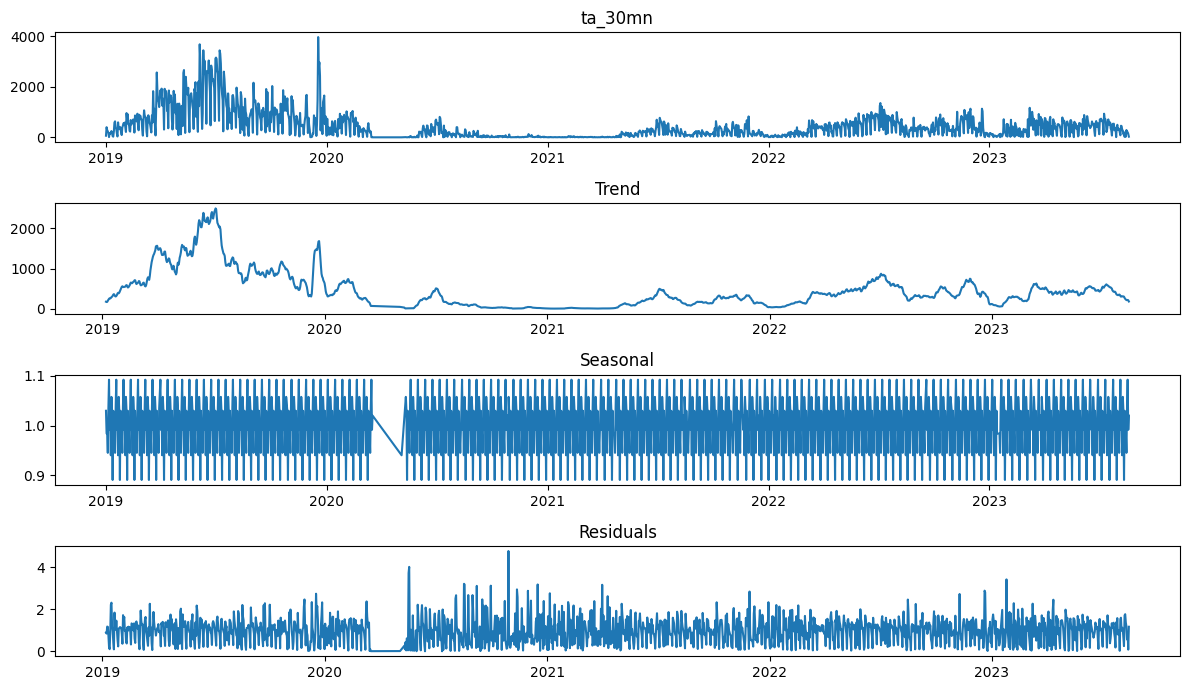

In [48]:
# @title
from statsmodels.tsa.seasonal import seasonal_decompose

# Ajoutez une constante à vos données
main_data['ta_30_positive'] = main_data['ta_30'] + 0.5  # Ajoutez 1 pour éviter les valeurs nulles

# Décomposition multiplicative
result = seasonal_decompose(main_data['ta_30_positive'], model='multiplicative', period = 12)

# Affichage des composants (tendance, saisonnalité, résidus)
plt.figure(figsize=(12, 7))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('ta_30mn')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()


Il ressort de cette figure:
- Des pics importants entre l'année 2019 et 2020 sur la tendance du nombre de passagers ayant attendus plus de 30mn au guichet SNCF dans les différentes gares.
- Le graphe de la saisonlité montre que dans le premier trimestre de l'annéee 2020, il y a eu une baisse de la fréquence du nombre de passagers dans les différentes gares de la SNCF.
- En fin les résidus sont plus important vers la fin de l'année 2020.

* * *

### <b>Exemples de décompositions</b>


<!DOCTYPE html>
<html>
    
<body>
  <meta charset="utf-8" />  
<div class="title-container" style="background-color: #3498db; color: #2ecc71; padding: 10px; border-radius: 5px; text-align: center; font-size: 10px">
<center>
<table border=2 width="100%" height="20%" style="font-size: 10px;">


<thead>
<tr>
<th width="55%" height="20%" style="font-size: 11px;"><center><h2><b> A. Décomposition basé sur le lissage par moyenne mobile simple </b> </h2></center> </th>
</tr>
</thead>

<tr>
<td> <center> <h2><b> Formule Mathématique</b></h2> </center></td>
<td> <center><h2><b> Principe de fonctionnement </b></h2></center></td>
</tr>
       
<tr>
<td><center><h2> MA(m) : $\hat{T}_{t} = \frac{1}{m}\sum_{j=-k}^{k}y_{t+j}$ <br>
$S_{t} = y_{t} - \hat{T}_{t}$ <br>
$\epsilon_{t} = y_{t} - S_{t}$<br><br>
<p> $S_{t}$ : Composante saisonnière à l'instant t : </p>
<p>$\hat{T}_{t}$ : Tendance-cycle estimée à l'instant t</p>
<p> $y_{t}$ : observation de la série temporelle à l'instant t </p>
<p>$\epsilon_{t}$ : résidus à l'instant t</p></h2> </center></td>

<td> <center><h2> La décomposition basée sur le lissage par moyenne mobile simple vise à isoler la tendance-cycle d'une série temporelle en utilisant une moyenne mobile pour créer une estimation lissée de la composante tendancielle. Cela permet de mieux visualiser les variations saisonnières et les résidus de la série. </h2></center></td>
</tr>

<tr>
<td> <center>  </center> </td>
<td> <center>  </center> </td>
</tr>

<thead>
<div style="background-color:#b42727; padding:10px;">
<tr>
<th width="50%" height="55%" style="font-size: 13px; "><center> <h2><b> B. Décomposition basé sur les LOESS (ou STL) </b> </h2></center></th>
</tr>
</div>
</thead>

<tr>
<td> <center><h2><b> Formule Mathématique </b></h2></center></td>
<td> <center><h2><b> Principe de fonctionnement </b></h2> </center></td>
</tr>

<tr>
<td><center><h2> à compléter </h2></center></td>

<td> <center><h2> La technique conciste à estimer la composante tendancielle locale, qui peut ensuite être soustraite des données originales pour obtenir des résidus utilisés dans la décomposition. </h2></center></td>
</tr>

<tr>
<td> <center> ... </center> </td>
<td> <center> ... </center> </td>
</tr>

<thead>
<tr>
<th width="50%" height="55%" style="font-size: 13px;"><center> <h2><b> C. Décomposition basé sur le lissage exponenciel (ETS) </b> </h2></th>
</tr>
</thead>

<tr>
<td> <center><h2><b> Formule Mathématique </b></h2></center></td>
<td> <center><h2><b> Principe de fonctionnement </b></h2> </center></td>
</tr>

<tr>
<td><center><h2> $l_{t} = \alpha y_{t} + (1 - \alpha)(l_{t-1} + \phi b_{t-1})$ <br></p>
$b_{t} = \beta (l_{t} - l_{t-1} + (1 - \beta)\phi b_{t-1}$ <br></p>
<p>Si le paramètre d'amortissement $\phi = 1$, on aura le modèle <br> de Holt :</p> <br>
$\hat{y}_{t|t-1} = l_{t-1}$ <br> </n></p>
$l_{t} = \alpha y_{t} + (1- \alpha)l_{t-1}$ <br></p>
    $b_{t} = \beta(l_{t} - l_{t-1}) + (1 - \beta)b_{t-1}$</h2></center></td>

<td> <center><h2> Le principe conciste à isoler la tendance (T), la saisonnalité (S) et le terme d'erreur (E) d'une série en utilisant une approche de lissage addaptatif qui accorde plus d'importance aux données plus rescentes</h2></center></td>
</tr>

<tr>
<td> <center> ... </center> </td>
<td> <center> ... </center> </td>
</tr>

<thead>
<tr>
<th width="50%" height="55%" style="font-size: 13px;"><center> <h2><b> D. Décomposition TBATS </b> </h2></center></th>
</tr>
</thead>

<tr>
<td> <center><h2><b> Formule Mathématique </b></h2></center></td>
<td> <center><h2><b> Principe de fonctionnement </b></h2> </center></td>
</tr>

<tr>
<td><center><h2> $y^{(\lambda)}_{t} = l_{t-1} + \phi b_{t-1} + \sum_{i=1}^{T}S_{t-m_{i}}^{(i)} + d_{t}$ <br></p>
$l_{t} = l_{t-1} + \phi b_{t-1} + \alpha d_{t}$ <br></p>
$b_{t} = \phi b_{t-1} + \beta d_{t}$ <br></p>
$d_{t} = \sum_{i=1}^{p}\phi_{i}d_{t-i} + \sum_{i=1}^{q}\theta_{i}\epsilon_{t-i} + \epsilon_{t} $ <br></p>
$S_{t}^{(i)} = \sum_{j=1}^{k_{i}}S_{j,t}^{(i)}$
</h2></center></td>

<td> <center><h2> Le TBATS combine des techniques de modélisation trigonométrique, de transformation de Box-Cox, d'ARMA pour les erreurs, et de modélisation de tendance et de saisonnalité pour fournir des prévisions précises pour les séries chronologiques avec des variations saisonnières multiples. </h2></center></td>
</tr>


</table>
</center>
</div>
</body>
</html>


* * *

### <b> Applications </b>

- **Pour le STL**

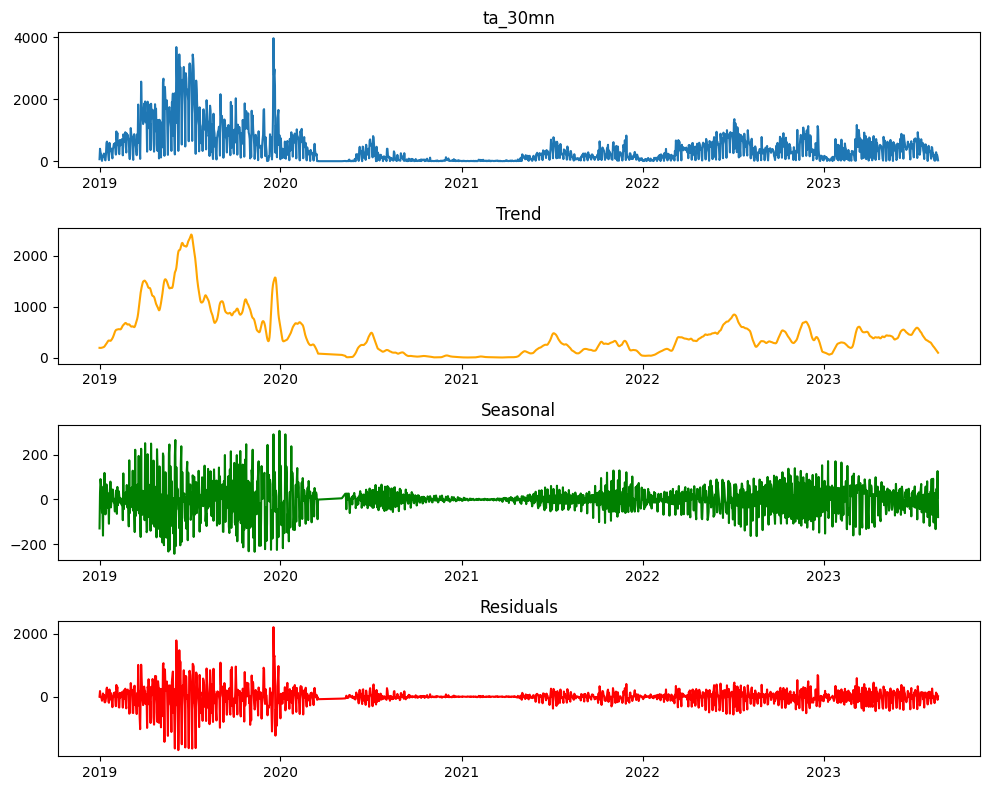

In [49]:
# @title
from statsmodels.tsa.seasonal import STL

decomp_stl = pd.Series(main_data['ta_30'].values, index=main_data.index, name="ta_30")

# Si l'index n'est pas de type datetime, convertissez-le
decomp_stl.index = pd.to_datetime(decomp_stl.index)

# Spécifions la fréquence explicite avec le paramètre period
stl = STL(decomp_stl, seasonal=13, period=12)  # Ajustons le paramètre saisonnier en fonction de la fréquence de nos données
res = stl.fit()

# Créons une figure avec une taille spécifiée
plt.figure(figsize=(10, 8))

# Subplot 1: Observed
plt.subplot(4, 1, 1)
plt.plot(res.observed)
plt.title('ta_30mn')

# Subplot 2: Trend
plt.subplot(4, 1, 2)
plt.plot(res.trend, color='orange')
plt.title('Trend')

# Subplot 3: Seasonal
plt.subplot(4, 1, 3)
plt.plot(res.seasonal, color='green')
plt.title('Seasonal')

# Subplot 4: Residus
plt.subplot(4, 1, 4)
plt.plot(res.resid, color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()



- Un pic apparait en fin d'année 2019 sur la tendance du nombre de passagers ayant attendu plus de 30mn au guichet.
- La saisonnalité dependent des saisons. Les maximums sont atteints généralement en fin d'année et en été. Ces saisons plus remarquables entre 2019 et 2020 et en 2023.

Cette decomposition semble traduire la réalité des données.

* * *

- **Pour le lissage par moyenne mobile simple**

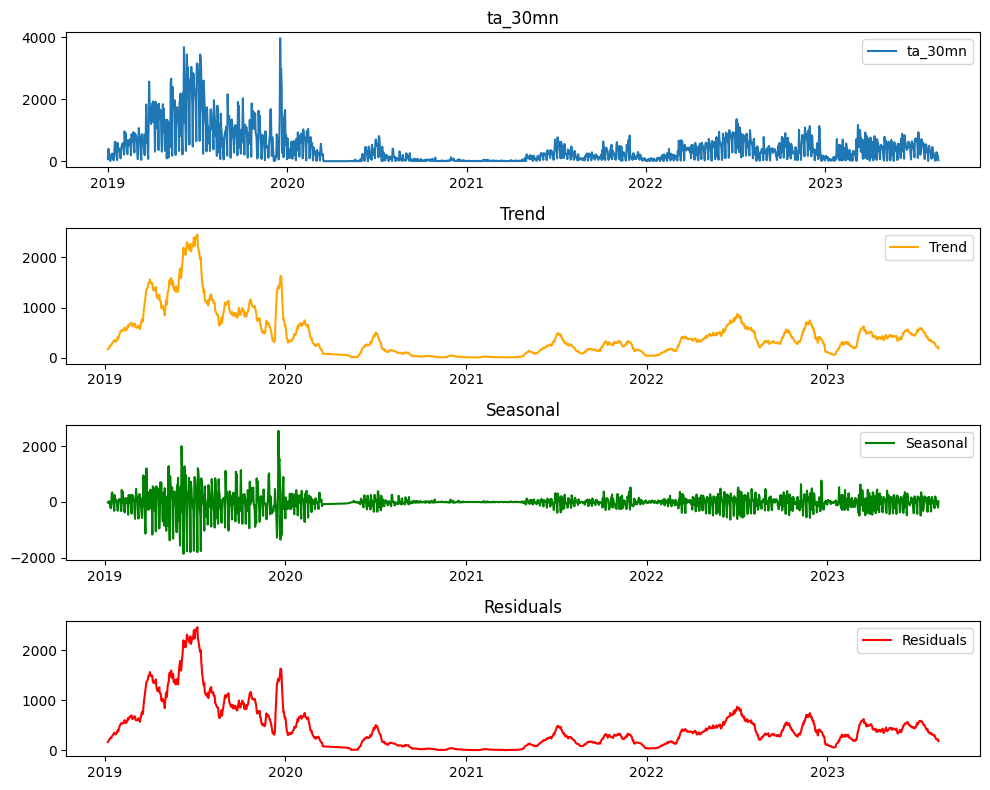

In [50]:
# @title

# Supposons que 'ta_30' est la colonne de votre DataFrame 'main_data' que vous souhaitez décomposer
decomp_mm = pd.Series(main_data['ta_30'].values, index=main_data.index, name="ta_30")

# Si l'index n'est pas de type datetime, convertissez-le
decomp_mm.index = pd.to_datetime(decomp_mm.index)

# Calcul de la moyenne mobile pour estimer la tendance
window_size_trend = 13
trend_mm = decomp_mm.rolling(window=window_size_trend, center=True).mean()

# Soustraction de la tendance pour obtenir la composante saisonnière
seasonal_component = decomp_mm - trend_mm

# Créons une figure avec une taille spécifiée
plt.figure(figsize=(10, 8))

# Subplot 1: Observed
plt.subplot(4, 1, 1)
plt.plot(decomp_mm, label='ta_30mn')
plt.title('ta_30mn')
plt.legend()

# Subplot 2: Trend
plt.subplot(4, 1, 2)
plt.plot(trend_mm, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Subplot 3: Seasonal
plt.subplot(4, 1, 3)
plt.plot(seasonal_component, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

# Subplot 4: Residuals
residuals = decomp_mm - seasonal_component
plt.subplot(4, 1, 4)
plt.plot(residuals, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()





* * *

## Autre modèle (Modèle Prophet)

L’outil open source **Prophet** tente de résoudre la problématique de prévision de données temporelles basé sur un modèle additif.

Prophet a pour but de résoudre les problématiques suivantes :

- La difficulté de créer des modèles de prévision fiables

- La rigidité et le manque de robustesse des techniques de prévisions automatiques.

En plus d'être basé sur le modèle additif, Prophet rajoute une nouvelle composante qui correspond à l'impcat des vacances sur le modèle.

Sa formule mathématique est données par :

$$y(t) = T(t) + h(t) + S(t) + \epsilon(t)$$

où
- $T(t)$ : la tendance,
- $S(t)$ : la composante saisonière
- $h(t)$ : les vacances
- $\epsilon(t)$ : la composante aléatoire ou erreur

In [ ]:
# @title
#!pip install prophet
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Création d'une dataframe contenant une colonne "ds" pour les dates et une colonne "y" pour nos valeurs
data_prophet = data_main[["date", "ta_30"]]
columns_name = {'date': 'ds', 'ta_30': 'y'}
data_prophet.rename(columns=columns_name, inplace=True)

model = Prophet()
model.fit(data_prophet)

future = model.make_future_dataframe(periods=730, freq='D')
forecast = model.predict(future)

# Filtrer les dates qui n'existent pas dans la figure 1
#dates_not_in_fig1 = forecast[~forecast['ds'].isin(data_prophet['ds'])]
date_fig2 = forecast[forecast['ds'] >= '2022-01-01']

# Créer un graphique avec Plotly Express pour data_prophet
fig = px.line(data_prophet, x='ds', y='y', labels={'ds': 'Date', 'y': 'Nombre de passagers'})

# Ajouter la série temporelle prédite de forecast pour les dates non présentes dans data_prophet
#if not dates_not_in_fig1.empty:
fig.add_trace(go.Scatter(x=date_fig2['ds'], y=date_fig2['yhat'], mode='lines', name='Prédictions'))

# Restreindre l'axe y à des valeurs positives
fig.update_yaxes(range=[0, max(data_prophet['y'].max(), date_fig2['yhat'].max())])

# Mettre à jour le layout du graphique
fig.update_xaxes(showgrid=True, tickangle=45)
fig.update_yaxes(showgrid=True)
fig.update_layout(
    width=1000,
    height=600,
    title="Evolution du nombre de passagers attendant plus de 30min entre Janvier 2019 et Août 2025"
)

fig.show()


**Décomposition par le Modèle Prophet**

In [ ]:
# @title
import plotly.express as px
from plotly.subplots import make_subplots  # Ajout de l'import

# Créer le graphique avec Plotly pour trend
fig1 = px.line(forecast, x='ds', y='trend')

# Mettre à jour le reste du layout
fig1.update_xaxes(showgrid=True, tickangle=45)
fig1.update_yaxes(showgrid=True)
fig1.update_layout(
    width=1200,
    height=600,
    title="Trend"
)

# Créer le graphique avec Plotly pour weekly
fig2 = px.line(forecast, x='ds', y='weekly')

# Mettre à jour le reste du layout
fig2.update_xaxes(showgrid=True, tickangle=45)
fig2.update_yaxes(range=[0, forecast['yhat'].max()], showgrid=True)
fig2.update_layout(
    width=1200,
    height=600,
    title="Weekly"
)

# Créer le graphique avec Plotly pour yearly
fig3 = px.line(forecast, x='ds', y='yearly')

# Mettre à jour le reste du layout
fig3.update_xaxes(showgrid=True, tickangle=45)
fig3.update_yaxes(showgrid=True)
fig3.update_layout(
    width=1000,
    height=600,
    title="Yearly"
)

# Créer une figure combinant les deux graphiques
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1, row_titles=['Trend', 'Weekly', 'Yearly'])

# Ajouter les traces des deux graphiques à la figure combinée
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)
fig.add_trace(fig3['data'][0], row=3, col=1)

# Mettre à jour le layout de la figure combinée
fig.update_layout(
    width=1100,
    height=900
)

fig.show()


**Performance du Modèle Prophet**

In [49]:
# @title
#from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_error

# Calcul de MSE et RMSE
y_true = data_prophet['y']
y_pred = forecast['yhat'][:len(y_true)]  # Take predictions for the original data length

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate AIC
"""residuals = y_true - y_pred
n = len(y_true)
k = model.component_modes['stan_backend']['k']
Aic = n * np.log(mse) + 2 * k"""

#performance = performance_metrics(forecast)

print(f"MSE Prophet: {round(mse,2)}")
print(f"RMSE Prophet: {round(rmse,2)}")
#print(f"AIC: {Aic}")

MSE Prophet: 100343.96
RMSE Prophet: 316.77


* * *

**Modèle de Holt Winters**

In [50]:
# @title
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create and fit the Holt-Winters model
model_hw = ExponentialSmoothing(data_prophet['y'], seasonal='add', seasonal_periods=365)
fit_hw = model_hw.fit()

# Make future dataframe and predict with Holt-Winters
future_hw = pd.date_range(start='2022-01-01', end='2025-08-31', freq='D')
forecast_hw = fit_hw.forecast(len(future_hw))

# Create a graph with Plotly Express for data_prophet
fig_hw = px.line(x=data_prophet['ds'], y=data_prophet['y'], labels={'ds': 'Date', 'y': 'Nombre de passagers'})

# Add the predicted time series for Holt-Winters
fig_hw.add_trace(go.Scatter(x=future_hw, y=forecast_hw, mode='lines', name='Prédictions Holt-Winters'))

# Restrict the y-axis to positive values
fig_hw.update_yaxes(range=[0, max(data_prophet['y'].max(), max(forecast_hw))])

# Update the layout of the graph
fig_hw.update_xaxes(showgrid=True, tickangle=45)
fig_hw.update_yaxes(showgrid=True)
fig_hw.update_layout(
    width=1000,
    height=600,
    title="Evolution du nombre de passagers attendant plus de 30min entre Janvier 2019 et Août 2025 - Holt-Winters"
)

# Show both figures
fig_hw.show()

* * *

**Performance du modèle Holt-Winters**

In [51]:
from sklearn.metrics import mean_squared_error

y_true = data_prophet['y'].iloc[:1339]
y_pred = forecast_hw

# Calcul du MSE et du RMSE pour le modèle Holt-Winters
mse_hw = mean_squared_error(y_true, y_pred)
rmse_hw = np.sqrt(mse_hw)

print(f"MSE Holt-Winters: {round(mse_hw,2)}")
print(f"RMSE Holt-Winters: {round(rmse_hw,2)}")

MSE Holt-Winters: 666173.97
RMSE Holt-Winters: 816.19


### ARMA

Le modèle ARMA est simplement la combinaison des deux modèles AR et MA :

- **Modèle de la Moyenne Mobile MA(q)**

Supposez que la valeur de la variable ta_30 du jour en cours dépend des termes d’erreur des jours précédents. La formule du processus $(Y_{t})$ MA d'ordre q peut être exprimée sous cette forme :

<span style="color: red; font-size: 15px;"> **$Y_{t} = \epsilon_{t} - \sum_{i=1}^{q}\theta_{i}\epsilon_{t}$** </span>

<span style="color: red; font-size: 15px;"> **Bruit du uniquement au présent = Bruit Présent - Bruit passé**</span>

où : 

- Les $\epsilon_{t}, \epsilon_{t-1}, ..., \epsilon_{t-q} $ sont les termes d'erreur de bruit
- Les $\theta_{1}, ..., \theta_{q}$ sont les paramètres du modèle

* * *

- **Modèle Auto-Régressif AR(p)**

Les modèles auto-régressifs fonctionnent en partant du principe que les valeurs passées ont un effet sur les valeurs actuelles. Tant que l’hypothèse tient, nous pouvons construire un modèle de régression linéaire qui tente de prédire aujourd’hui la valeur de la variable temps d'attente (ta_30), compte tenu des valeurs qu’elle avait les jours précédents.

Un processus $(Y_{t})$ AR d'ordre p s'excrit sous la forme : 

<span style="color: red; font-size: 15px;"> **$Y_{t} = \sum_{i=1}^{p}\phi{i}Y_{t-1} - \epsilon_{t}$**</span>

<span style="color: red; font-size: 15px;"> **Présent = Passé + Nouveauté par rapport au passé**</span>


Avant de pouvoir créer un modèle de prédiction de données temporelles, nous devons nous s'assurer que la série temporelle est **stationnaire**. 

# Stationnarité

La série reste stationnaire si elle reste constante dans le temp.

### Statistiques roulantes 

In [57]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

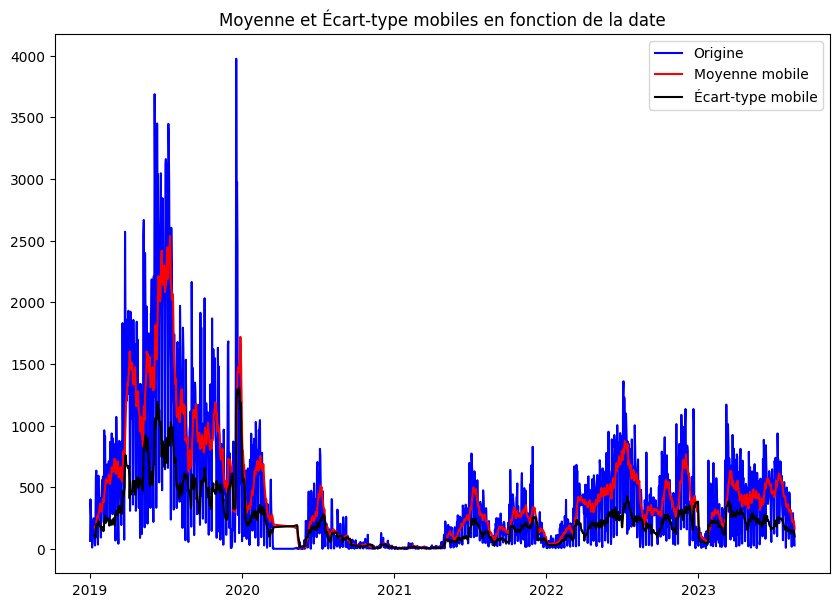

In [58]:
data_main_model = data_main.iloc[:,[0,1]]

rolling_mean = data_main_model['ta_30'].rolling(window = 12).mean()
rolling_std = data_main_model['ta_30'].rolling(window = 12).std()

# pour tracer les données d'origine, la moyenne mobile et l'écart-type mobile
plt.figure(figsize = (10, 7))
plt.plot(data_main_model['date'], data_main_model['ta_30'], color='blue', label='Origine')
plt.plot(data_main_model['date'], rolling_mean, color='red', label='Moyenne mobile')
plt.plot(data_main_model['date'], rolling_std, color='black', label='Écart-type mobile')

# pour ajouter une légende et un titre
plt.legend(loc='best')
plt.title('Moyenne et Écart-type mobiles en fonction de la date')

# Afficher le graphique
plt.show()

La moyenne mobile et l’écart-type mobile augmentent avec le temps et des période. Nous pouvons donc conclure que la série temporelle n’est pas stationnaire.

## Test de Dickey-Fuller augmenté (ADF) sur les données d'origine

La série temporelle est considérée comme stationnaire si la valeur de p est faible (selon l'hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l'ADF (Augmented Dickey-Fuller).

In [59]:
result = adfuller(data_main_model['ta_30'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.593631404206753
p-value : 0.09432068359817186
Valeurs Critiques :
	1%: -3.434461656404719
	5%: -2.863356053770622
	10%: -2.567736831977157


La statistique ADF est proche des valeurs critiques et la p-value est supérieure au seuil (0,05). On peut donc conclure que la série temporelle n’est pas probablement stationnaire.

Il existe de multiples transformations que nous pouvons appliquer à une série temporelle pour la rendre stationnaire. Par exemple : 

## La différentiation

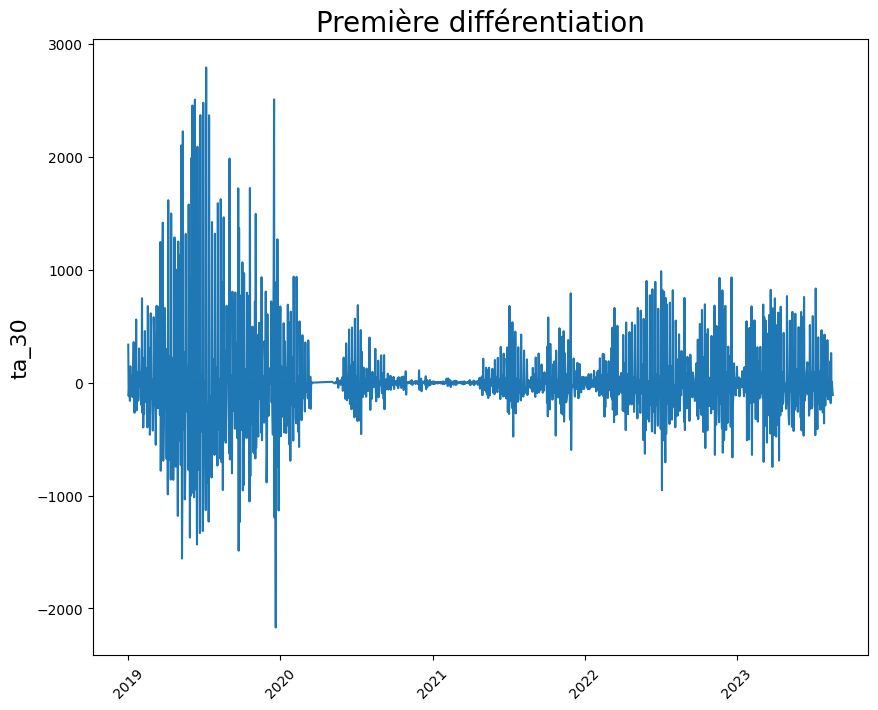

In [60]:
from datetime import datetime

premier_diff = data_main['ta_30'].diff()[1:]

plt.figure(figsize = (10, 8))
plt.plot(data_main['date'].iloc[0:1615], premier_diff)
# Correction du format des dates pour l'axe des abscisses
plt.xticks(rotation=45)
plt.axhline(premier_diff.mean(), color='r', alpha=0.01, linestyle='--')
plt.title('Première différentiation', fontsize=20)
plt.ylabel('ta_30', fontsize=16)  # La correction est ici, il faut utiliser 'ylabel' au lieu de 'ylabe'

plt.show()


La différentiation soustrait la valeur actuelle de la précédente et peut être utilisée pour transformer une série temporelle en une série stationnaire. Par exemple, la différentiation du premier ordre traite des tendances linéaires. La différenciation du second ordre traite des tendances quadratiques et utilise une différence du premier ordre sur une différence du second ordre, à savoir $z_{i} = (y_{i} – y_{i-1}) – (y_{i-1} – y_{i-2})$, et ainsi de suite.

**ACF :**

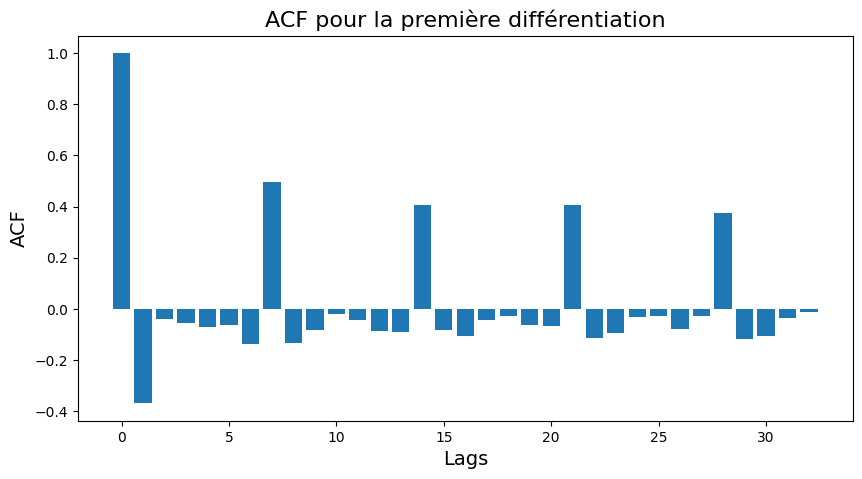

In [61]:
from statsmodels.tsa.stattools import acf, pacf

premier_diff = data_main_model['ta_30'].diff()[1:]

# Calcul de l'ACF
acf_graphe = acf(premier_diff)

# pour tracer le graphe de barre pour l'ACF
num_lags = len(acf_graphe)
plt.figure(figsize = (10, 5))
plt.bar(range(num_lags), acf_graphe[:num_lags])
plt.title('ACF pour la première différentiation', fontsize=16)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plt.show()


Après avoir observé ce graphe, nous pouvons commencer par un **MA(1)** car nous voyons que le décalage est assez fort et puis pour deux, il s'arrête en quelque sort.

**PACF :**

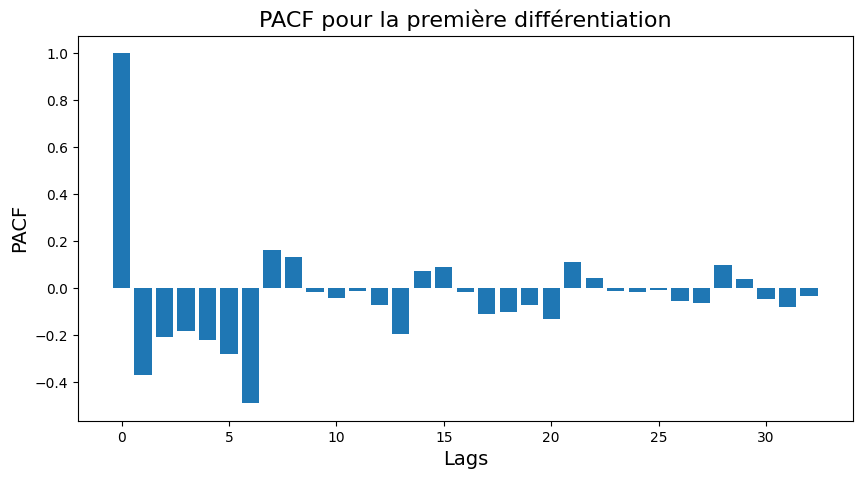

In [62]:
# Calcul du PACF
pacf_graphe = pacf(premier_diff)

# pour tracer le graphe de barre pour le PACF
num_lags = len(pacf_graphe)
plt.figure(figsize = (10, 5))
plt.bar(range(num_lags), pacf_graphe[:num_lags])
plt.title('PACF pour la première différentiation', fontsize=16)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.show()


Ici le décalage est à 6. Ceci nous incite à commencer par un processus **AR(6)**.

**Vérifions la stationnarité avant de continuer pour la suite.**

In [63]:
result = adfuller(premier_diff.values)
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


Statistiques ADF : -11.398819114235025
p-value : 7.738431027721337e-21
Valeurs Critiques :
	1%: -3.434461656404719
	5%: -2.863356053770622
	10%: -2.567736831977157


La statistique ADF est loin des valeurs critiques mais la p-value reste quand même inférieure au seuil. La série est stationnaire.

Nous allons créer un processus **ARMA(6, 1)**.

- **ARMA(6, 1)**

In [64]:

arma = data_main.iloc[:, 1]

# Spécifions l'ordre de l'ARMA
order = (6, 0, 1)  # 6 ordres AR, 1 ordres de différenciation, 1 ordre MA

# Utilisons la classe ARIMA avec l'ordre spécifié et trend='n' pour un modèle ARMA
model_arma = sm.tsa.ARIMA(arma, order=order, trend='n').fit()
#print(model_arma.params)

# Obtenons la table de synthèse
summary_table = model_arma.summary()

# Extrait les informations des coefficients
coef_data = summary_table.tables[1].data

# Créons un DataFrame à partir des données des coefficients
coef_df = pd.DataFrame(coef_data, columns=coef_data[0])

# Surlignons chaque colonne avec une couleur différente
styled_df = coef_df.style.apply(lambda col: ['background-color: red' if col.name == 'P>|z|' else 'background-color: green' if col.name == 'coef' else '' for _ in col], axis=0)

# Affichons le résumé du modèle
display(summary_table)

# Affichons le DataFrame stylisé
display(styled_df)
#model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ta_30   No. Observations:                 1616
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -11639.852
Date:                Tue, 17 Sep 2024   AIC                          23295.705
Time:                        17:41:27   BIC                          23338.807
Sample:                             0   HQIC                         23311.702
                               - 1616                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8181      0.032     25.288      0.000       0.755       0.881
ar.L2         -0.0542      0.023     -2.365      0.018      -0.099      -0.009
ar.L3         -0.0345      0.018     -1.877      0.060      -0.071       0.002
ar.L4         -0.0240      0.020     -1.175      0.240      -0.064       0.016
ar.L5          0.0204      0.023      0.901      0.368      -0.024       0.065
ar.L6          0.2587      0.022     11.789      0.000       0.216       0.302
ma.L1         -0.5038      0.031    -16.009      0.000      -0.566      -0.442
sigma2      1.055e+05   1448.635     72.805      0.000    1.03e+05    1.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.99   Jarque-Bera (JB):             10580.21
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La colonne en vert correspond aux coefs des paramètres du modèle et la colonne en bleu donne la p-value de chacun des paramètres. Ici on voit que la majorité des paramètres sont bons car la p-value est inférieure à 0,05. Seulement trois paramètres ont des p-values supérieures au seuil. Le modèle est globalement bons. On verra par la suite sa qualité de prediction.

- Prédiction du modèle ARMA(6,1) :

In [65]:
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px


# pour obtener les prédictions
pred = model_arma.predict()

fig = go.Figure()

# Ajoutons une ligne pour les données réelles
fig.add_trace(go.Scatter(x=data_main['date'], y=data_main['ta_30'], mode='lines', name='Données réelles'))

# Ajouter une ligne pour les prédictions du modèle ARMA
fig.add_trace(go.Scatter(x=data_main['date'], y=pred, mode='lines', name='Prédictions du modèle ARMA', line=dict(color='red')))

# Pour personnaliser la mise en page
fig.update_layout(
    title='Comparaison des données réelles et des prédictions du modèle ARMA',
    xaxis_title='Date',
    yaxis_title='ta_30',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
    template='plotly_white'
)

fig.show()


En conclusion, on est arrivés à modéliser notre série temporelle, mais notre modèle possède des limites que nous avons abordées plus haut. Pour traiter des séries temporelles non stationnaires, on pourra utiliser le modèle **ARIMA** qui ajoute une **différentiation**. Comme notre série présente une saisonnalité, c’est-à-dire des variations à un intervalle de temps régulier, il fera par la suite le modèle **SARIMA**.

# Modèle ARIMA(p,d,q)


Ce modèle a trois paramètres, chacun correspondant à chaque « composante » du modèle. Il s’écrit ARIMA(p, d, q) où p, d et q sont des entiers naturels et constituent les paramètres du modèle.

- **p** est le nombre de décalages qu’il faudra considérer pour le modèle auto-régressif. Si p est égal à 6, alors le modèle considère que $x_{t}$ dépend (linéairement) de $x_{t-1}, x_{t-2}, x_{t-3}, ..., x_{t-6}$ 

- **d** est le nombre de fois qu’il faut différencier la série afin de la rendre stationnaire. d doit être égale à 0 dans le cas d’un processus déjà stationnaire.

- **q** est l’ordre du modèle MA.



<center>
<table border=2 style="font-size: 40px;">

<thead>
<tr>
<th width="50%" height="20%" style="color: red; font-size: 30px;"><center> Le modèle se compose de trois éléments : 
 </center></th>
</tr>

</thead>
</table>
</center>

<center>
<table border=2 width="100%" height="100">

<thead>
<tr>
<th width="50%" height="55%" style="font-size: 30px;"><center> Compsantes </center></th>
<th width="50%" height="55%" style="font-size: 30px;"><center> Explications </center></th>
</tr>
</thead>

<tr>
<td> <center> <span style = "font-size: 25px;"> Autorégressif </span></center> </td>
<td> <center> <span style="font-size: 20px;"> Modèle qui utilise la relation de dépendance entre une observation et un certain nombre d'observations décalées.</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 25px;">Intégré </span></center> </td>
<td> <center> <span style="font-size: 20px;">L'utilisation de la différenciation des observations brutes (par exemple en soustrayant une observation de l'observation au pas de temps précédent) afin de rendre la série chronologique stationnaire.</span> </center> </td>
</tr>

<tr>
<td> <center> <span style = "font-size: 25px;">Moyenne mobile </span></center> </td>
<td> <center> <span style="font-size: 20px;">Modèle qui utilise la dépendance entre une observation et une erreur résiduelle d'un modèle de moyenne mobile appliqué aux observations décalées.</span> </center> </td>
</tr>

</table>
</center>

**ARIMA(6, 1, 1)** : Première différentiation

In [66]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

df_arima = data_main['ta_30']

model_arima = ARIMA(df_arima, order=(6, 1, 1))
results_arima = model_arima.fit()  # Supprimez le paramètre disp
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  ta_30   No. Observations:                 1616
Model:                 ARIMA(6, 1, 1)   Log Likelihood              -11482.618
Date:                Tue, 17 Sep 2024   AIC                          22981.237
Time:                        17:41:38   BIC                          23024.333
Sample:                             0   HQIC                         22997.232
                               - 1616                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8724      0.023    -38.354      0.000      -0.917      -0.828
ar.L2         -0.6958      0.018    -39.715      0.000      -0.730      -0.661
ar.L3         -0.6353      0.014    -44.646      0.000      -0.663      -0.607
ar.L4         -0.6326      0.016    -40.096      0.000      -0.663      -0.602
ar.L5         -0.6177      0.017    -35.913      0.000      -0.651      -0.584
ar.L6         -0.5320      0.011    -49.190      0.000      -0.553      -0.511
ma.L1          0.2053      0.027      7.586      0.000       0.152       0.258
sigma2      8.939e+04   1152.566     77.560      0.000    8.71e+04    9.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):             17955.34
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

La p-value est toujour inférieure au seuil au premère différentiation. Le modèle est donc significative.

**Test de non stationnarité**

- De Dickey-Fuller

In [67]:
#from statsmodels.tsa.stattools import adfuller

# Obtenez les résidus du modèle ARIMA
#results_arima = model_arima.fit()
residus = results_arima.resid

# Test de Dickey-Fuller pour la stationnarité des résidus
result = adfuller(residus)
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


Statistiques ADF : -10.394498187480634
p-value : 1.981385831034684e-18
Valeurs Critiques :
	1%: -3.4344694268256246
	5%: -2.863359483478656
	10%: -2.5677386582809225


P-value inférieure au seuil, la série est alors stationnaire après la première différentiation.

- PPTest (le test de Phillips-Perron)

In [68]:
from arch.unitroot import PhillipsPerron

# Effectuons le test de stationnarité de Phillips-Perron
pp_test = PhillipsPerron(residus)
resultats_test = pp_test

# Affichons les résultats du test
print("Statistique du test :", resultats_test.stat)
print("P-value :", resultats_test.pvalue)
print("Nombre de lags :", resultats_test.lags)

Statistique du test : -39.79333019114046
P-value : 0.0
Nombre de lags : 25


La série est stationnaire par différentiation.

**Test de stationnarité**

- kpss test : la stationnarité autour du tendance affine.

In [69]:
from statsmodels.tsa.stattools import kpss


# le test KPSS sur les résidus
resultats_test_kpss = kpss(residus)

# les résultats du test KPSS de manière similaire à R
print(f"Statistique du test KPP: {resultats_test_kpss[0]}")
print(f"P-value: {resultats_test_kpss[1]}")
print(f"Lags utilisé: {resultats_test_kpss[2]}")
print("Valeurs critques:")
for key, value in resultats_test_kpss[3].items():
    print('\t{}: {}'. format(key, value))

Statistique du test KPP: 0.031580615023737935
P-value: 0.1
Lags utilisé: 10
Valeurs critques:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


La p-value est ici supérieur à 0.05, la série n'est pas stationnaire par différentiation pour ce test.

**Normalité des résidus**

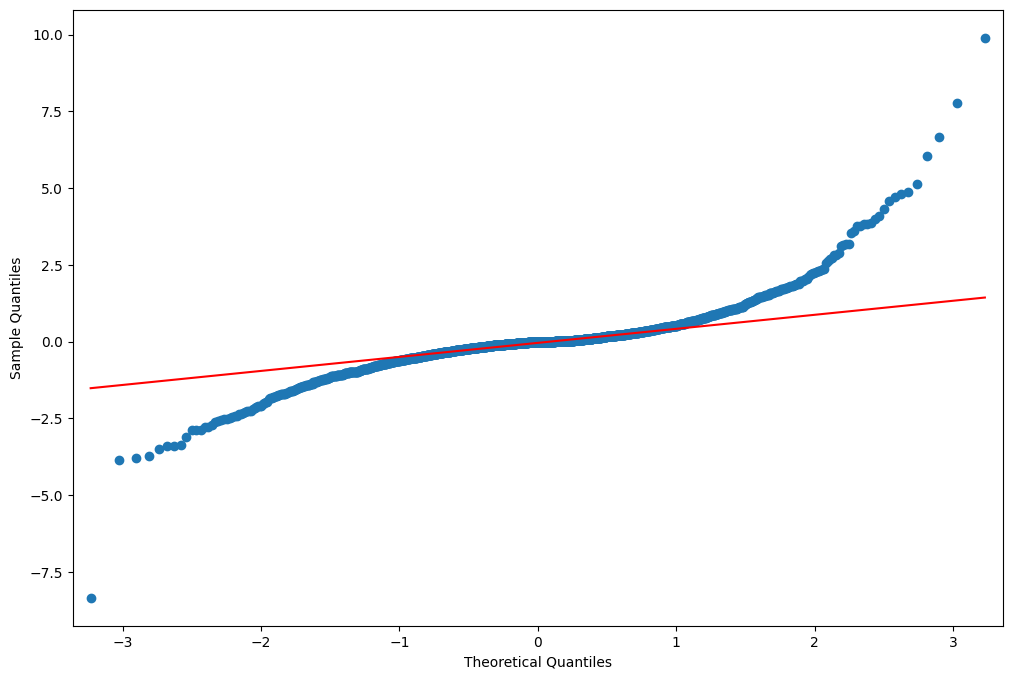

In [70]:
from statsmodels.graphics.api import qqplot

resid = results_arima.resid

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

# les stistiques du test
#stats.normaltest(resid)

Les points bleus ne se situent pas principalement sur la droite rouge, ce qui se traduit graphiquement par la non-normalité de la distribution des résidus.

### Prédiction en fonction des valeurs réélles

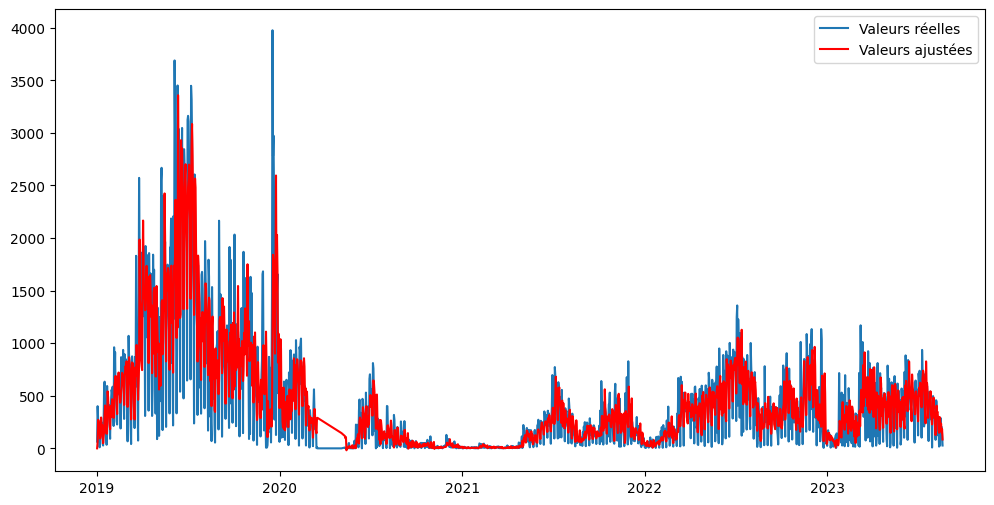

In [71]:
results = model_arima.fit()
# Tracez les valeurs ajustées par le modèle ARIMA
plt.figure(figsize=(12, 6))
plt.plot(data_main['date'], df_arima, label='Valeurs réelles')
plt.plot(data_main['date'], results.fittedvalues, color='red', label='Valeurs ajustées')
plt.legend(loc='upper right')
plt.show()

Les valeurs prédites sont quand même pas mauvaises car elles sont proches des valeurs réélles.

# Modèle SARIMA

SARIMA sert à prédire les valeurs futures sur la base de données historiques ayant une composante saisonnière. Par exemple, les temps d'attentes des voyaseurs au niveau des gichets SNCF pendant les périodes des vacances et de fin d'années.

On ajoute du modèle arima, le **lag** qui indique la durée saisonnière dans les données.

Nous pouvons vérifier la présence de saisonnalité en regardant le graphique ACF. Il affiche des pics aux valeurs de décalage 7, 14, 21, etc. La série n’est donc pas stationnaire. Nous devons le supprimer pour pouvoir faire l'analyse. Cela se fera par différenciation et vérifié à l'aide de tests statistiques comme ADF (pour la tendance) et OSCB (pour la saisonnalité).

**OSCB** : si la valeur est inférieure à 0,64, la série est stationnaire

Puisque nous ne sommes pas sûrs de l'équation exacte du modèle, nous effectuerons une recherche par grille avec la liste des valeurs possibles autour de nos paramètres estimés. Nous choisirons ensuite le modèle avec le moins d'AIC.

In [72]:
import itertools

p = range(0, 7)
d = range(1, 7)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

"""print('Exemples de combinaisons de paramètres pour ARIMA saisonnier...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))"""
seasonal_pdq
best_aic = np.inf
best_model = None

### Exécution du modèle SARIMA

Après avoir obtenu les commandes de modèles à partir de la recherche de grille ci-dessus, nous ajustons un modèle SARIMA à nos données.

In [73]:
#SARIMA(0, 1, 1)x(2, 1, 0, 12)
from pylab import rcParams
mod = sm.tsa.statespace.SARIMAX(main_data.ta_30,
                                order=(6, 3, 1),
                                seasonal_order=(2, 1, 1, 7))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 7.173145
         Iterations: 8
         Function evaluations: 996
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3280      0.015    -90.829      0.000      -1.357      -1.299
ar.L2         -1.2439      0.024    -51.805      0.000      -1.291      -1.197
ar.L3         -1.0286      0.030    -33.901      0.000      -1.088      -0.969
ar.L4         -0.8195      0.034    -24.296      0.000      -0.886      -0.753
ar.L5         -0.5537      0.032    -17.105      0.000      -0.617      -0.490
ar.L6         -0.2781      0.030     -9.137      0.000      -0.338      -0.218
ma.L1         -0.9999      0.330     -3.033      0.002      -1.646      -0.354
ar.S.L7        0.0296      0.037      0.795      0.427      -0.043       0.103
ar.S.L14      -0.0181      0.020     -0.915      0.360      -0.057      

**Diagnostic du modèle**

a) Si les résidus ont une moyenne autre que zéro, alors les prévisions sont biaisées.

b) S'il existe des corrélations entre les résidus, il reste alors des informations dans les résidus qui doivent être utilisées dans le calcul des prévisions.

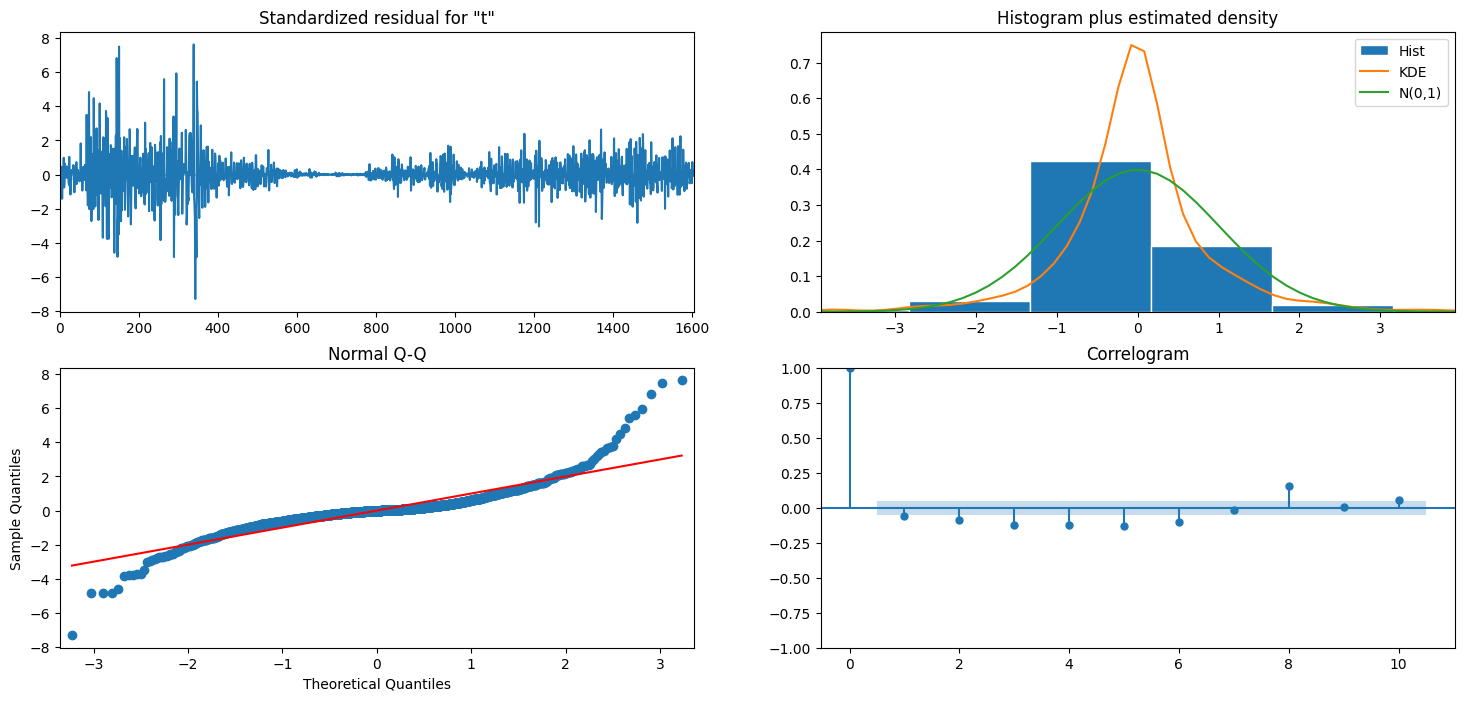

In [74]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

Comme nous pouvons le voir sur l’image ci-dessus, les résidus ne sont pas corrélés et ont une moyenne nulle. On peut donc dire que le modèle est bien ajusté.

**Prédictions**

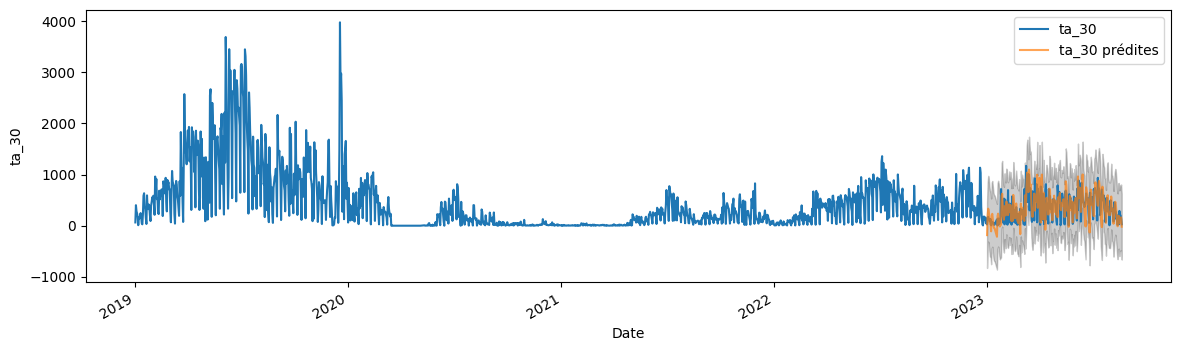

In [75]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = main_data.ta_30.plot(label='ta_30')
pred.predicted_mean.plot(ax=ax, label='ta_30 prédites', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('ta_30')
plt.legend()
plt.show()

Pour évaluer les performances du modèle, nous utilisons l'erreur quadratique moyenne (RMSE).

In [76]:
# Utilisez results.get_prediction() pour obtenir les prévisions
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
y_forecasted = pred.predicted_mean

# Utilisez main_data.loc pour sélectionner les vraies valeurs correspondant à la période de prévision
y_truth = main_data.loc['2023-01-01':, 'ta_30']

# Calcul du MSE
mse = ((y_forecasted - y_truth) ** 2).mean()

# Affichage du MSE et du RMSE
print('Le MSE : {}'.format(round(mse, 2)))
print('Le RMSE : {}'.format(round(np.sqrt(mse), 2)))


Le MSE : 76986.6
Le RMSE : 277.46


# Conclusion

Nous pouvons conclure qu'après avoir faire nos prévisions, on constate que le nombre de passagers qui prennent leurs tickets dans les guichets de la SNCF diminue au fur et à mesure et devient casiment nul au tour de l'année 2025.

Cela est du au fait que la SNCF mène une politique incitant les passagers à faire des réservations sur le site ou l'application ce qui permet d'eviter les files d'attentes interminables et de gagner en temps.


# Perspective

Nous allons utiliser les modèles qui nous permettent de prendre en compte l'intégration des variables qualitatives que nous utiliserons comme covariable dans nos modèles. Cela nous permettra de faire de meilleurs prévisions en prenant en compte par exemple les vacances.
